In [454]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt
import os
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 22})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import inspect

In [3]:
os.path.abspath(inspect.getfile(simplem))

'/Users/gr_1/Documents/simplem/simplem_par.py'

In [169]:
import numpy as np
## Figures
folder = 'results/r_mn05_6/'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)
slps2 =np.load('{}/slps2.npy'.format(folder),allow_pickle=True)

In [170]:
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [90]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [91]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()

badn = []
badd = []
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])

        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>500:
                #print(len(x[np.logical_not(np.isnan(x))]))
#                 if 1:
#                     x = x[ y > -5 ]

#                     y = y[ y > -5 ]
                print(len(x))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
            
                intercept = np.mean( y - x )
  
            ####
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * np.exp(intercept)#p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                #try:
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                #r2s[i] = sklearn.metrics.mean_gamma_deviance(y.reshape(-1,1),y2)
                #except:
                #print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = sklearn.metrics.mean_absolute_error(np.exp(y.reshape(-1,1)),np.exp(y2))
                print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = intercept
                drat[i][np.isinf(drat[i])] = 0
                dratave[i] = np.mean(drat[i][drat[i]>0])
               # if resid[i]>127.9:
                #    break
        else:
            print('lj1i2eoifwje')
a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])

3198
3198


<ipython-input-91-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])


NameError: name 'drat' is not defined

Text(0, 0.5, 'r2')

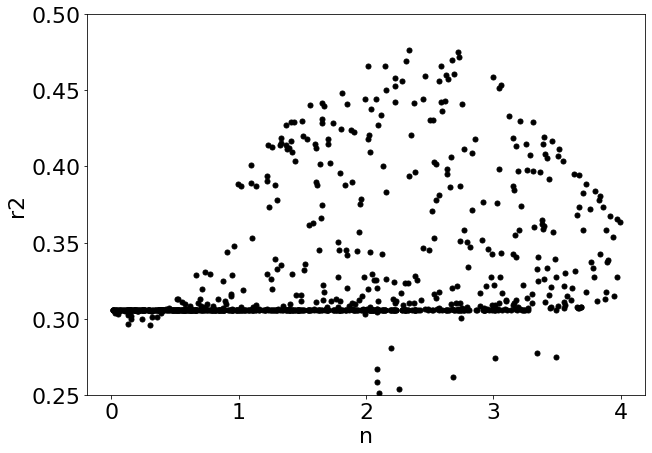

In [436]:

fig,ax = plt.subplots(figsize=(10,7))
plt.plot(ns,r2s,'.k',markersize=10)

#plt.xscale('log')
#plt.xlim([0, 1])
#
plt.ylim([.25, .5])
plt.xlabel('n')
plt.ylabel('r2')
#plt.xlim(([0, 4]))


In [398]:
ms

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

5.800966333320803

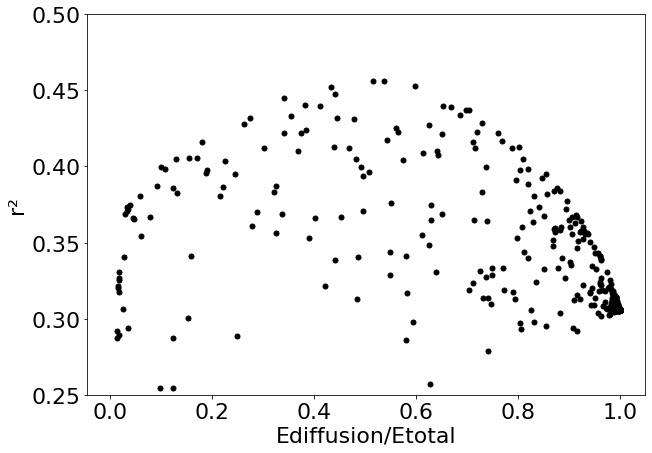

In [453]:
log = np.log10
fig,ax = plt.subplots(figsize=(10,7))
plt.plot(dratave,r2s,'.k',markersize=10)
#plt.xscale('log')
plt.xlabel('Ediffusion/Etotal')
#plt.xlim([1,10**8])
plt.ylabel('r'+ '2'.translate(superscript))
plt.ylim([.25,.5])
diffus[np.argmin(r2s)]/ks[np.argmin(r2s)]

In [454]:
(dratave)[np.argmax(r2s)]

0.5158436810534341

In [81]:
b1 = pd.DataFrame()
b1['r' +'2'.translate(superscript)] = r2s
b1['log(D/k)'] = np.log10(diffus/ks) 
b1['n'] = ns
b1['Diffusion/total'] = dratave
b1['top'] = pd.qcut(b1['r²'],[.98,1])
b2 = b1[~b1['top'].isna()]
sns.violinplot(data=b2,y='n')

b1 = pd.DataFrame()
b1['r' +'2'.translate(superscript)] = r2s
b1['log(D/k)'] = np.log10(diffus/ks) 
b1['n'] = ns
b1['Diffusion/total'] = dratave
b1['top'] = pd.qcut(b1['r²'],[.95,1])

NameError: name 'sns' is not defined

In [439]:
np.max(r2s)

0.47672036931650386

Text(0.5, 0, 'D/k ratio')

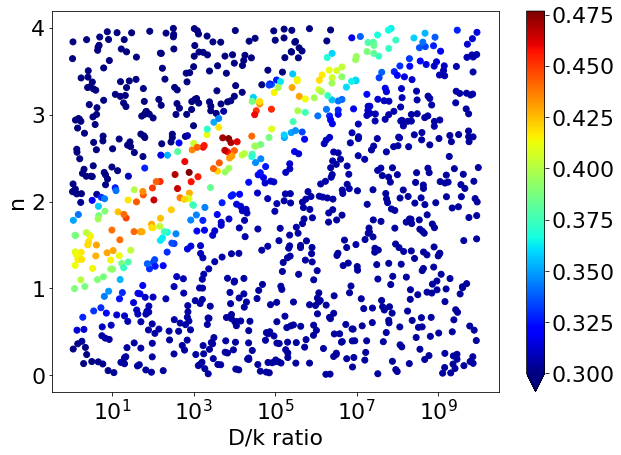

In [438]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')


In [97]:
ns[np.argmax(r2s)]

2.060090188998529

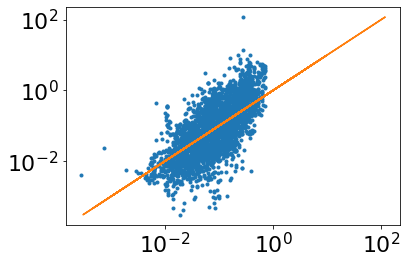

In [440]:
plt.plot(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')

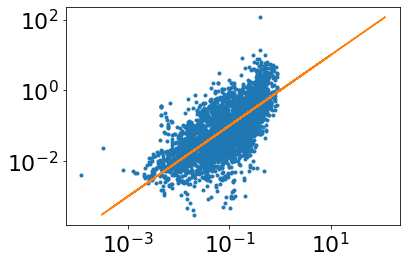

In [441]:
plt.plot(dfs[10][:len(a)]*np.exp(pcoef[10]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')

3.8859454666439635


2.0191858680673165

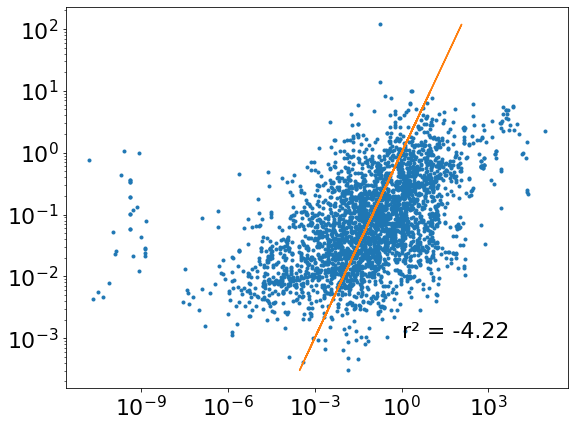

In [679]:
plt.subplots(figsize=(9,7))
n1 = 998# Xth worst estimate
plt.plot(dfs[np.argsort(r2s)[-n1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-n1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.text(1,.001, 'r' + '2'.translate(superscript) + ' = ' + str(r2s[np.argsort(r2s)[-n1]])[:5])
plt.xscale('log')
plt.yscale('log')
print(ns[np.argsort(r2s)[-n1]])
diffus[np.argsort(r2s)[-n1]]/ks[np.argsort(r2s)[-n1]]

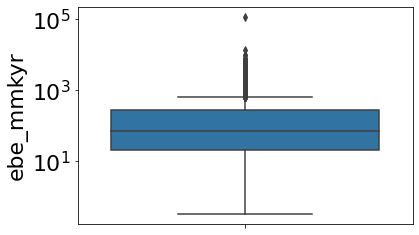

In [688]:
sns.boxplot(data=a,y ='ebe_mmkyr')
a['log(ebe_mmkyr)'] = np.log10(a['ebe_mmkyr'])
plt.yscale('log')

In [228]:
diffus[np.argmax(r2s)]/ks[np.argmax(r2s)]

1804.5545601198119

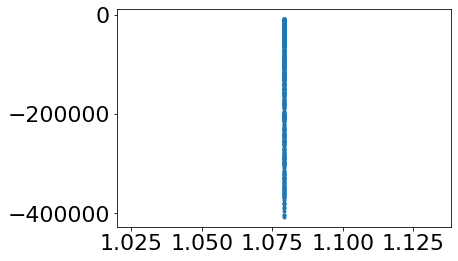

In [497]:
plt.plot(np.log10(careas),resid,'.')
#plt.ylim([.2, .5])

(array([41., 31., 33., 26., 20., 35., 21., 15., 24., 22.]),
 array([0.01062576, 1.00164145, 1.99265713, 2.98367281, 3.97468849,
        4.96570417, 5.95671985, 6.94773553, 7.93875122, 8.9297669 ,
        9.92078258]),
 <BarContainer object of 10 artists>)

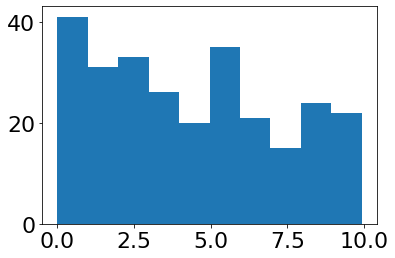

In [226]:
l = np.log10(diffus/ks)
plt.hist(l[r2s>.3])
#plt.plot(np.log10(diffus/ks),r2s,'.')
#plt.ylim([.2, .5])

NameError: name 'areas' is not defined

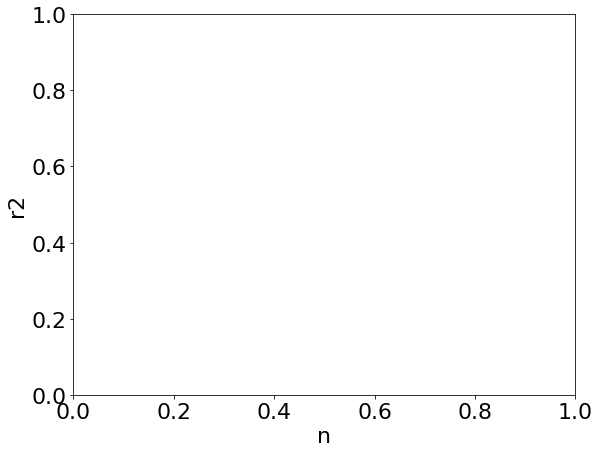

In [496]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.xlabel('n')
plt.ylabel('r2')
plt.scatter(ns,r2s,10,c=a[areas])
plt.ylim([0,.5])
#plt.xscale('log')
#plt.yscale('log')


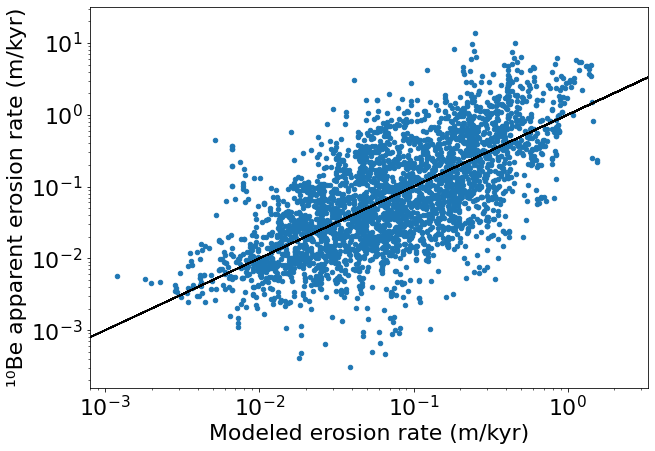

In [113]:
fig, ax = plt.subplots(figsize = (10,7))
io =np.argmax(r2s)
plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr']/1000,s=20)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.1,10**.52])
plt.ylim([10**-3.8,10**1.5])
plt.xlabel('Modeled erosion rate (m/kyr)')
plt.ylabel('{}Be apparent erosion rate (m/kyr)'.format('10'.translate(superscript)))
plt.xscale('log')
plt.yscale('log')
#plt.colorbar()

In [53]:
np.max(a.centroid.y)

<ipython-input-53-9bf30d9964c4>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  np.max(a.centroid.y)


51.5038464267361

Text(0, 0.5, 'Slope Octopus')

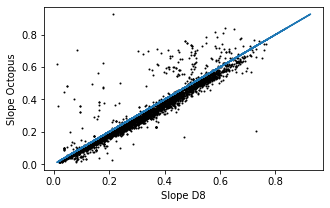

In [44]:
fig, ax = plt.subplots(figsize = (5,3))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553][slps2[:3553]>0],a['slp_ave'][slps2[:3553]>0]/1000,c='k', s=1)
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
plt.xlabel('Slope D8')
plt.ylabel('Slope Octopus')

#plt.xscale('log')
#plt.yscale('log')


In [56]:
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)>.2)[0]) 

50

In [138]:
#slps1 = gpd.read_file('basins_aspect_means_0 (2).csv')
#slps1 = pd.to_numeric(slps1['slp_ave'],errors='coerce')

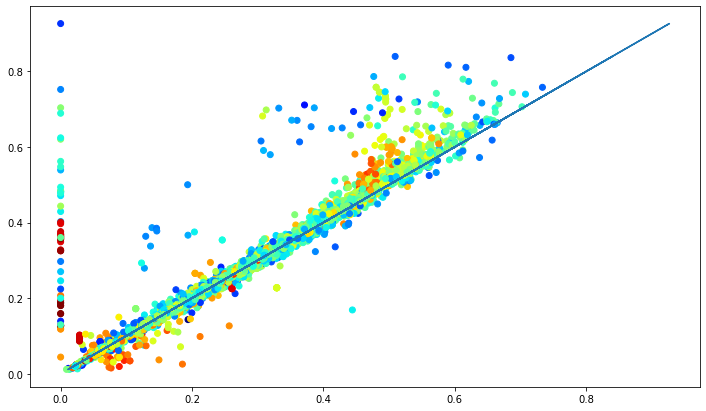

In [218]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['slp_ave']/1000,c=np.log10(a['area']),cmap='jet')
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
#plt.yscale('log')


In [225]:
np.argmax((slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000))

2145

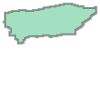

In [238]:
a.geometry[2145]

212

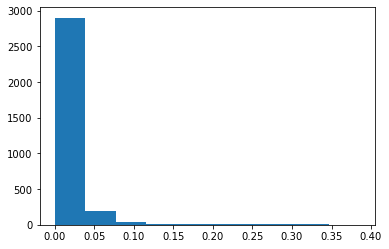

In [169]:
plt.hist((np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)))
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000) > .05)[0])

<ipython-input-177-7581de6ca083>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')


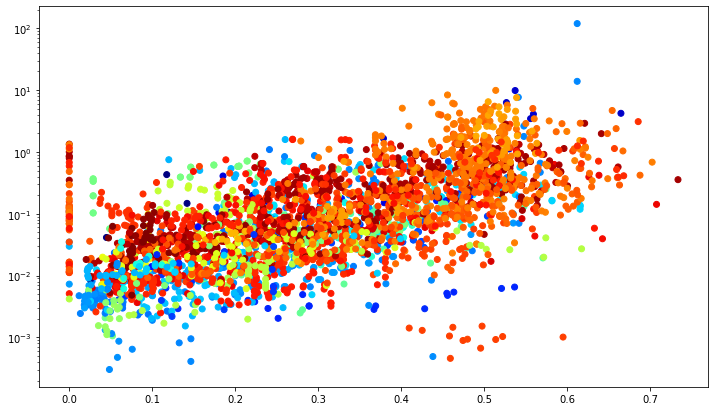

In [177]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')
plt.yscale('log')

<ipython-input-193-a1e92631e24c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], '.')


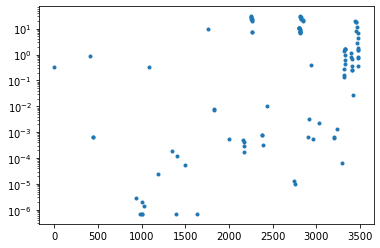

In [193]:
plt.yscale('log')

<ipython-input-195-77bdca639977>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[a['area']>0], '.')
<ipython-input-195-77bdca639977>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')


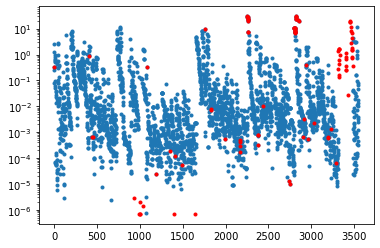

In [195]:
plt.plot(a.area[a['area']>0], '.')
plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')

plt.yscale('log')

In [189]:
np.mean(a['area'][a['area']>0])

3705.5099137177367

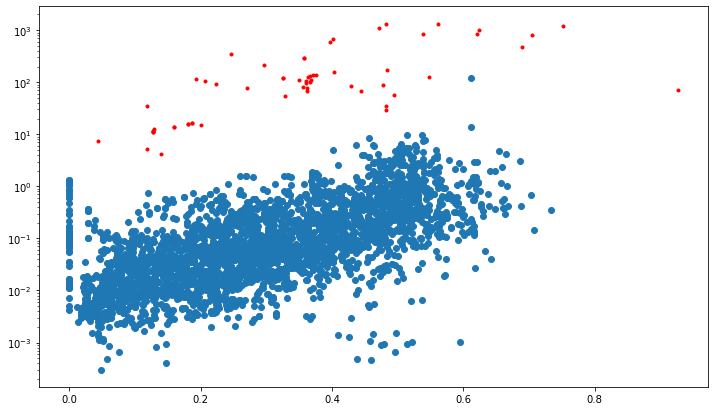

In [183]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000)#,c=(a.centroid.y))
#plt.scatter(a['slp_ave']/1000, a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')

#plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
plt.yscale('log')
plt.plot(a['slp_ave'][slps2[:3553]==0]/1000, a['ebe_mmkyr'][slps2[:3553]==0], 'r.')

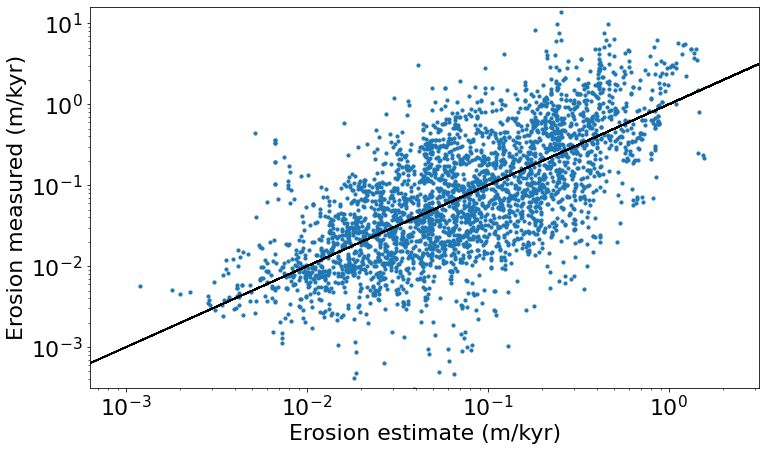

In [107]:
fig, ax = plt.subplots(figsize = (12,7))
r2s = -resid
plt.scatter(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,s=10)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.2,10**.5])
plt.ylim([10**-3.5,10**1.2])
plt.xlabel('Erosion estimate (m/kyr)')
plt.ylabel('Erosion measured (m/kyr)')
plt.xscale('log')
plt.yscale('log')
#c = plt.colorbar()
#c.set_label('log(Drainage area (km)' + '2'.translate(superscript) + ')')

In [92]:
from scipy.stats import bartlett

(0.0, 5.0)

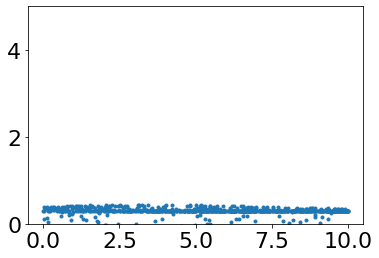

In [241]:
plt.plot(np.log10(diffus/ks),r2s,'.')
plt.ylim([0,5])

<ipython-input-106-a2047c141dde>:4: RuntimeWarning: divide by zero encountered in log10
  a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-106-a2047c141dde>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 10**6])


(0.013385378085027523, 1000000)

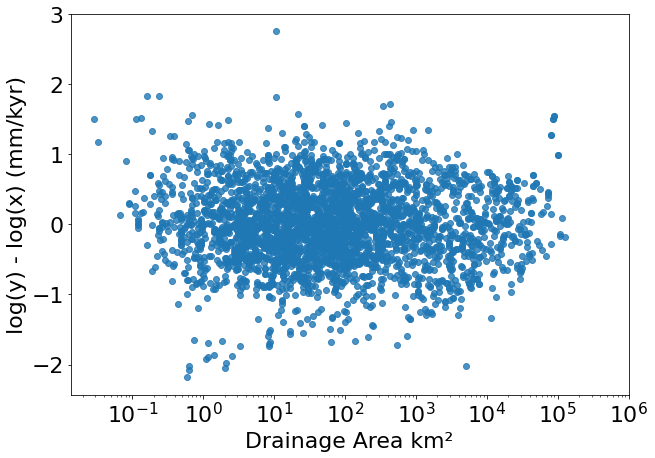

In [106]:
import seaborn as sns
plt.subplots(figsize = (10,7))
a['resid'] = 1
a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
loc = a.index[np.isinf(a['resid'])]
#a['bio12'][loc] = 0
sns.regplot(data=a,x='area',y='resid',fit_reg=True,scatter=True)
plt.xscale('log')
plt.xlabel('Drainage Area ' + 'km' +'2'.translate(superscript))
plt.ylabel('log(y) - log(x) (mm/kyr)')
plt.xlim([0, 10**6])


In [149]:
a2 = a.loc[~a['resid'].isna()]
a2 = a2.loc[~a2['area'].isna()]
a2 = a2.loc[~(a2['resid']>1e20)]
a2 = a2.loc[~(a2['area']>1e20)]
a2 = a2.loc[~(a2['resid']<-1e20)]
a2 = a2.loc[~(a2['area']<-1e20)]

In [151]:
p1 = a2['resid'][a2['area']>10**3].to_numpy()
p2 = a2['resid'][a2['area']<=10**3].to_numpy()

bartlett(p1,p2)

BartlettResult(statistic=4.28507663992576, pvalue=0.038448349142781967)

In [1481]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

array([   0,   37,  113,  114,  408,  447,  449,  467, 1071, 1072, 1089,
       1184, 1349, 1391, 1407, 1474, 1494, 1671, 1765, 1832, 1833, 1999,
       2166, 2169, 2172, 2174, 2255, 2256, 2257, 2258, 2259, 2260, 2261,
       2262, 2263, 2381, 2382, 2385, 2433, 2746, 2751, 2803, 2804, 2805,
       2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2818, 2819,
       2820, 2821, 2822, 2851, 2852, 2905, 2912, 2939, 2967, 3028, 3199,
       3200, 3236, 3291])

In [ ]:
plt.scatter(np.log10(a['area']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.subplots(figsize=(5,5))
plt.scatter(np.log10(a['slp_ave']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.figure()
plt.scatter(np.log10(a['ebe_mmkyr']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)


In [7]:
import numpy as np
## Figures
folder = 'results/var_concavity_1//'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

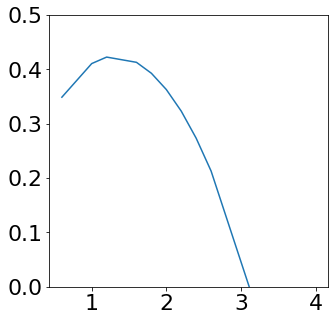

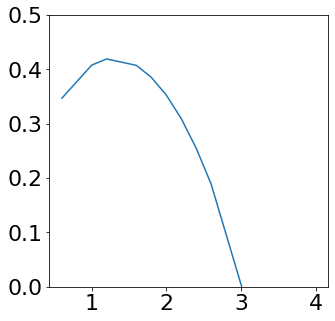

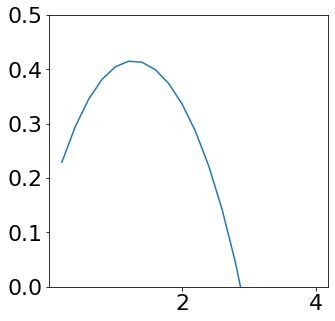

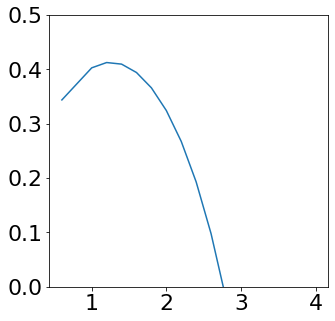

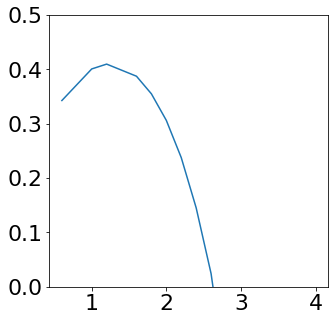

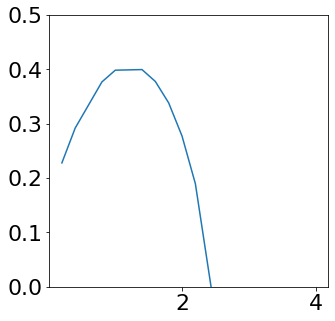

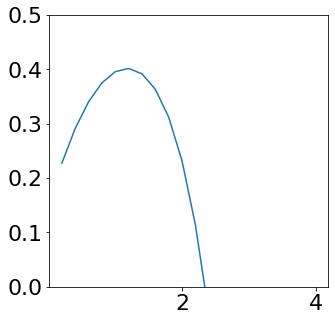

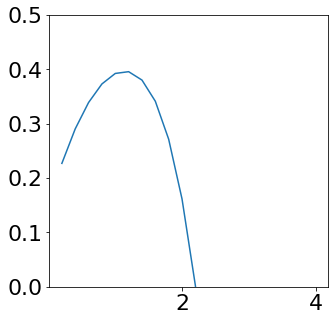

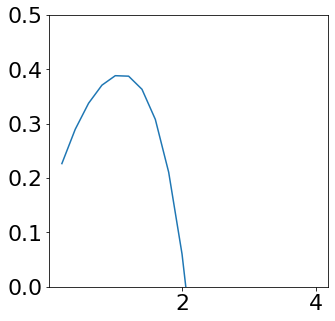

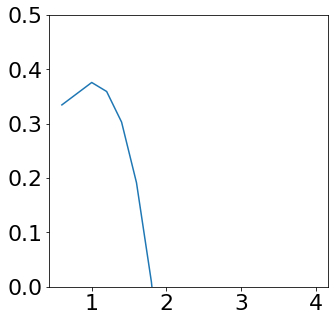

In [508]:
ss = np.unique(np.round(ms/ns,2))
o = np.zeros(len(ss))
for c,s in enumerate(ss):
    fig,ax = plt.subplots(figsize=(5,5))
    I = np.where(ms/ns==s)[0]
    plt.plot(ns[I],r2s[I])
    plt.ylim([0, .5])
    o[c] = np.max(r2s[I])
    c+=1


## Compare w/ bio data

In [653]:
# maybe ... 
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')
#a.index = range(len(a))
#a = a[(a['ebe_mmkyr']>0)]

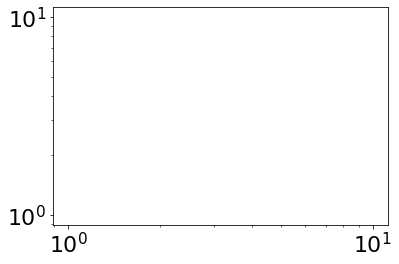

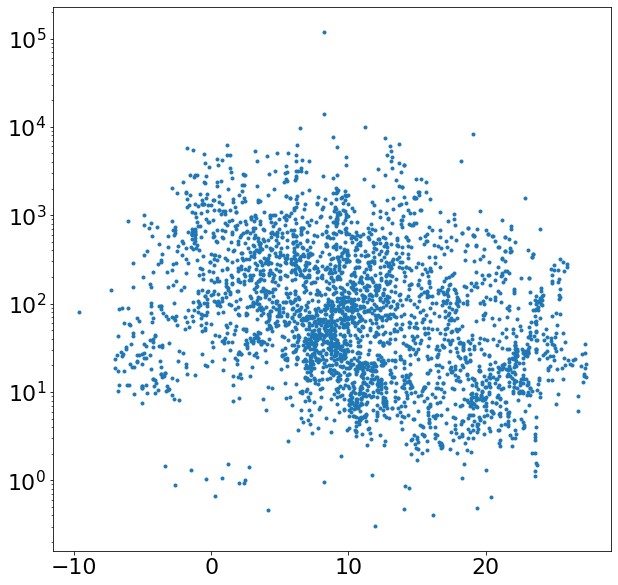

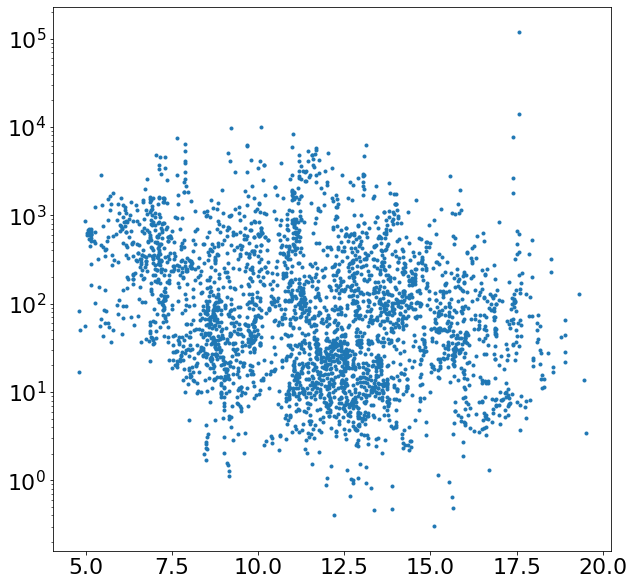

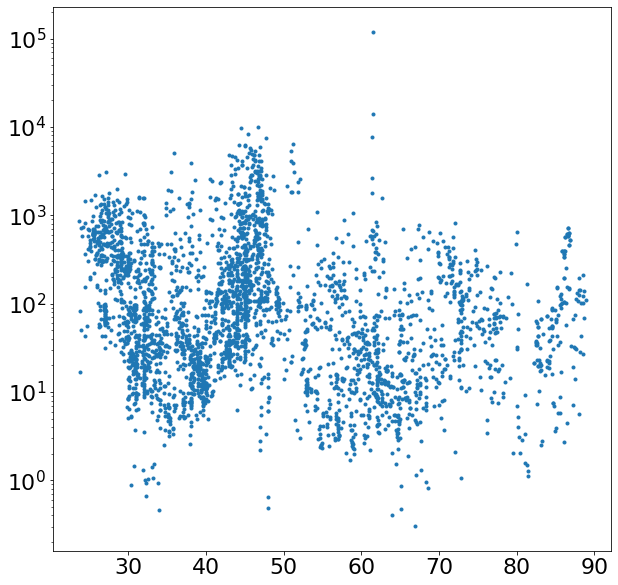

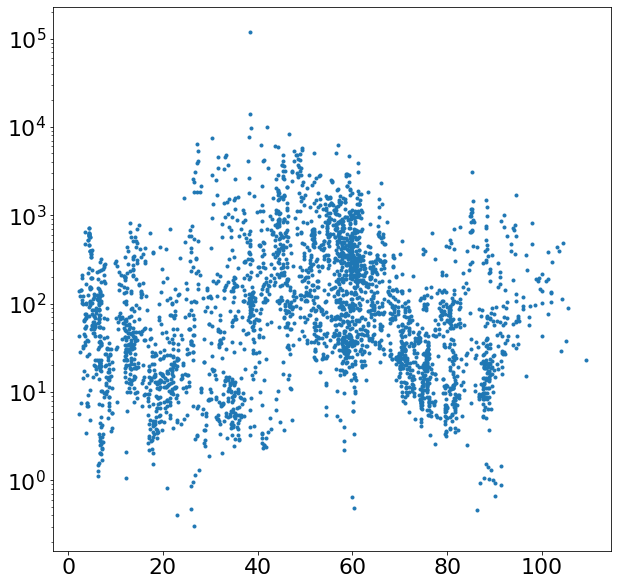

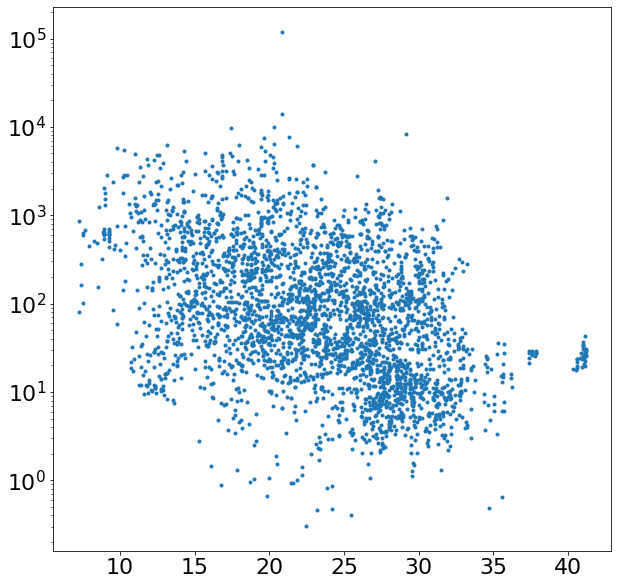

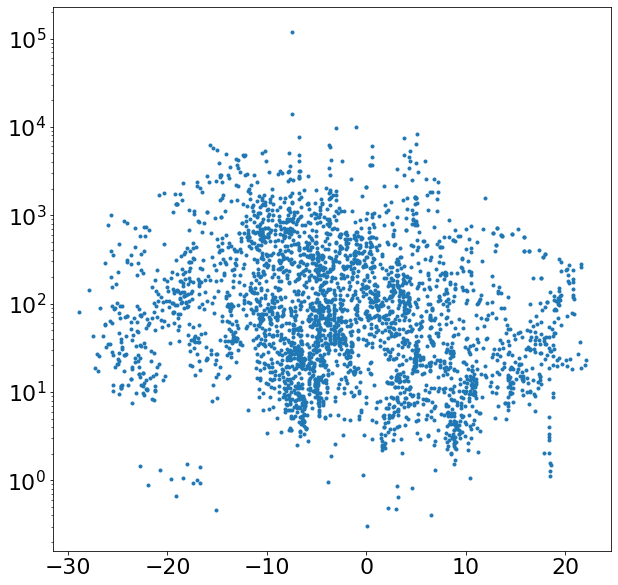

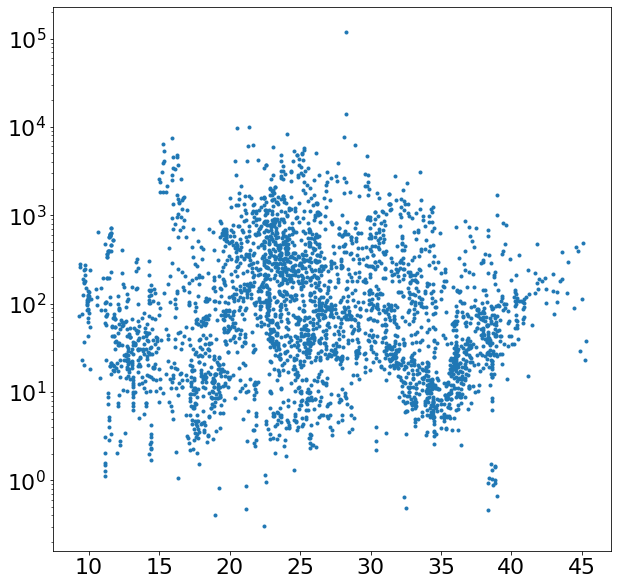

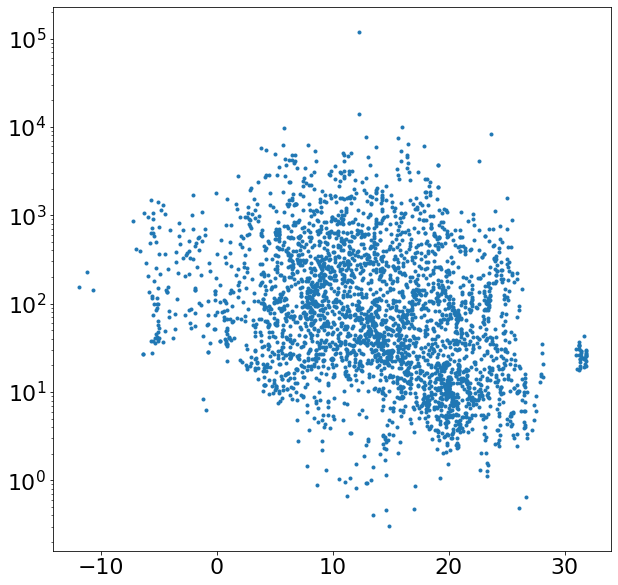

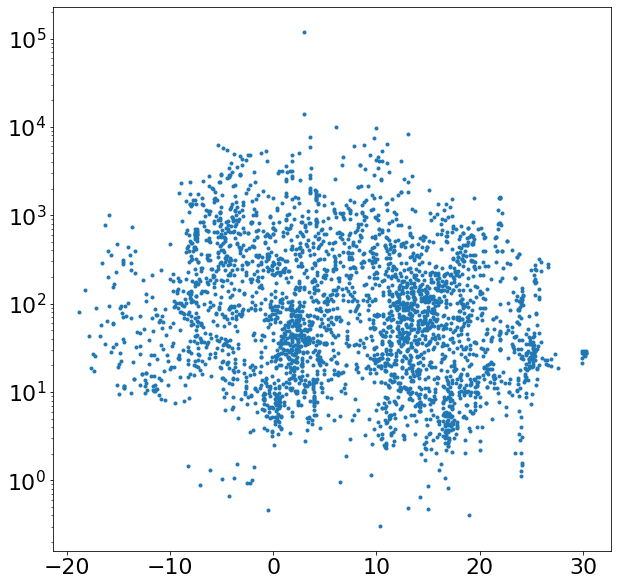

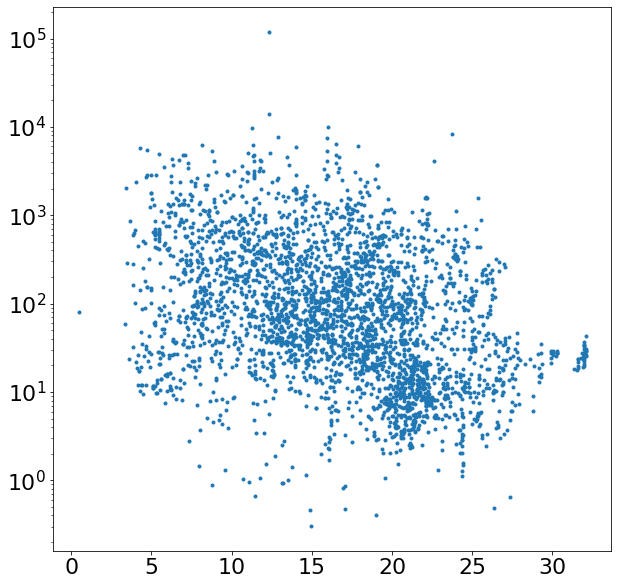

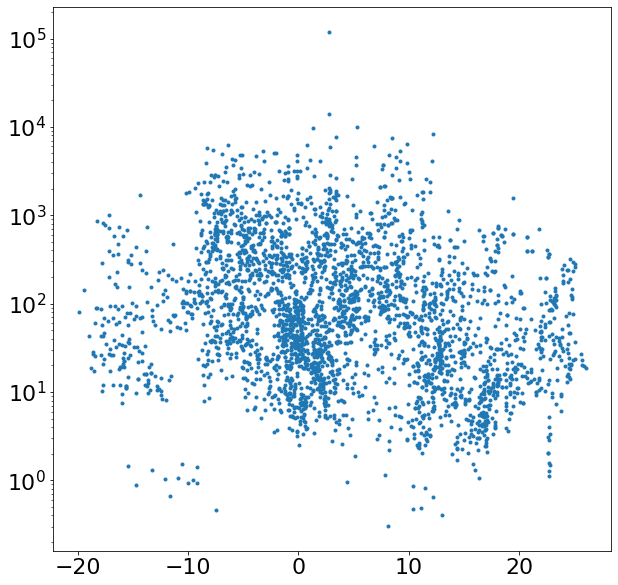

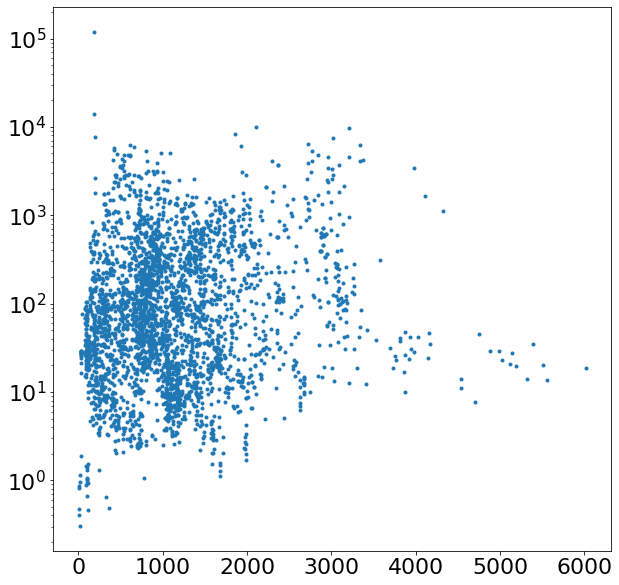

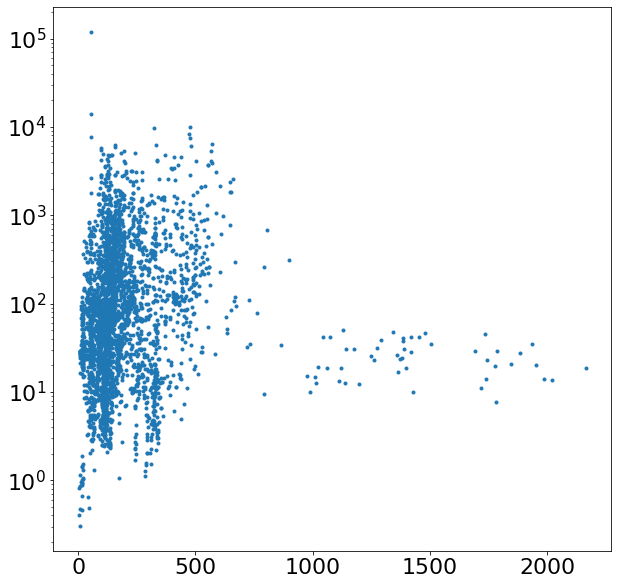

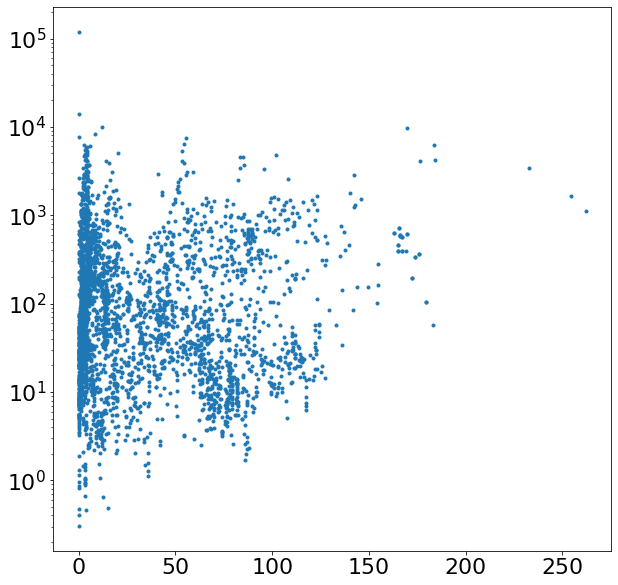

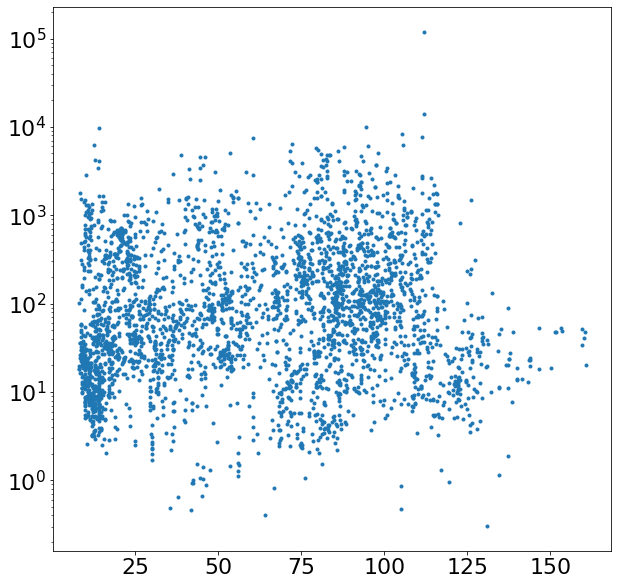

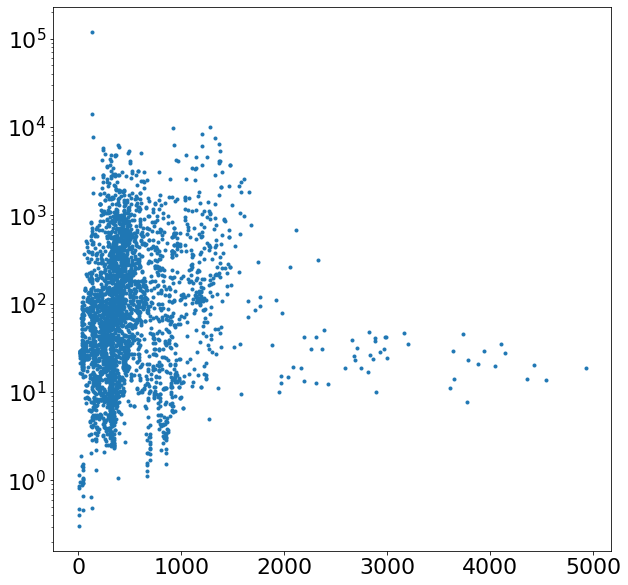

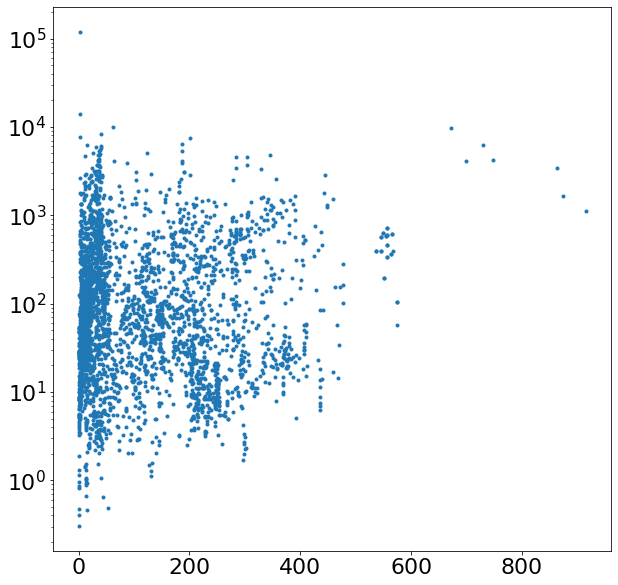

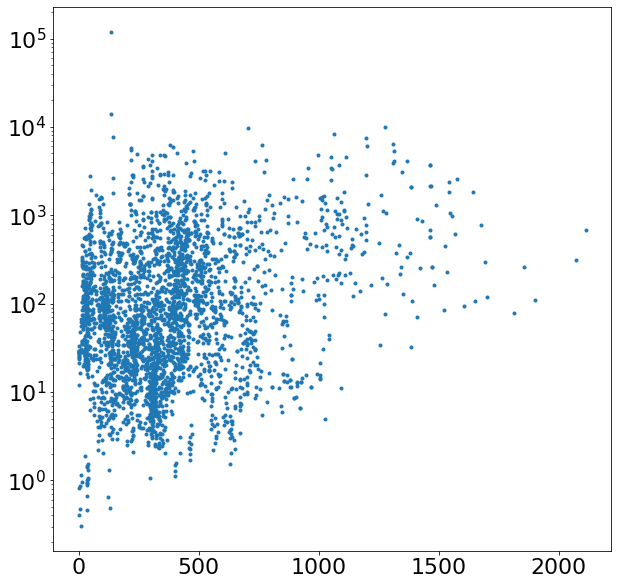

In [460]:
import seaborn as sns
scales = [0,10,10,1,100,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1]
a['realid'] = a.index

for i in range(1,19):
    n = pd.read_csv('/Users/gr_1/Google Drive_1/data_earth_engine/basins_bio_{}.csv'.format(str(i)))
    if i == 1:
        ns1 = n
    #ns['bio'+str(i)] = n['mean']
    # a['ebe_mmkyr'] = np.round(a['slp_ave'],4)
   # n['ebe_mmkyr'] = np.round(n['ebe_mmkyr'],4)
    #n['slp'] = a['slp_ave']
    plt.xscale('log')
    plt.yscale('log')
    n.index = n['realid']
    a['bio' + str(i)] = 0
    #a['bio' + str(i)] = n['mean']/scales[i]
    a['bio' + str(i)] = n['mean']/scales[i]
    #sns.scatterplot(data=a,x='bio' + str(i),y='ksn')
    n.index = range(len(n))
    #a2['bio_old'+str(i)] = n['mean']
for i in range(1,19):
    fig,ax = plt.subplots(figsize=(10,10))

    plt.plot(a['bio' + str(i)],a['ebe_mmkyr'],'.')
    #plt.xscale('log')
    plt.yscale('log')

   # plt.ylim([1, 100])



In [461]:
import jenkspy
#a['meantempclass'] = pd.qcut(a['bio12'],4)
#a['meantempclass'] = pd.cut(a['bio12'],[0,1000,2000,4000,np.Inf])
#a['meantempclass'] = pd.cut(a['bio15'],[0,50,100,150,np.Inf])

#breaks = jenkspy.jenks_breaks(a['bio12'], nb_class=5)
if 0:
    r1 =  np.power(10.0,np.float64(list(np.arange(-2,6,1.75)))).tolist()
    #r1.insert(0,10**-2)
    #r1.insert(len(r1)+1,10**6)
    a['area'][np.isnan(a['area'])] = 0
    a['elev_ave'][a['elev_ave'] == 0] = np.nan
    a['meantempclass'] = pd.cut(a['elev_ave'],5)
    a['meantempclass']

a['meantempclass'] = pd.qcut(a['bio12'],5)
#a['meantempclass'] = list(zip(pd.qcut(a['bio12'],3), pd.qcut(a['bio1'],3)))
#a['meantempclass'] = pd.qcut(a['bio1'] - a['bio14'], 10)


<ipython-input-391-f4c54442928e>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a2.geometry = a.geometry.centroid


<AxesSubplot:>

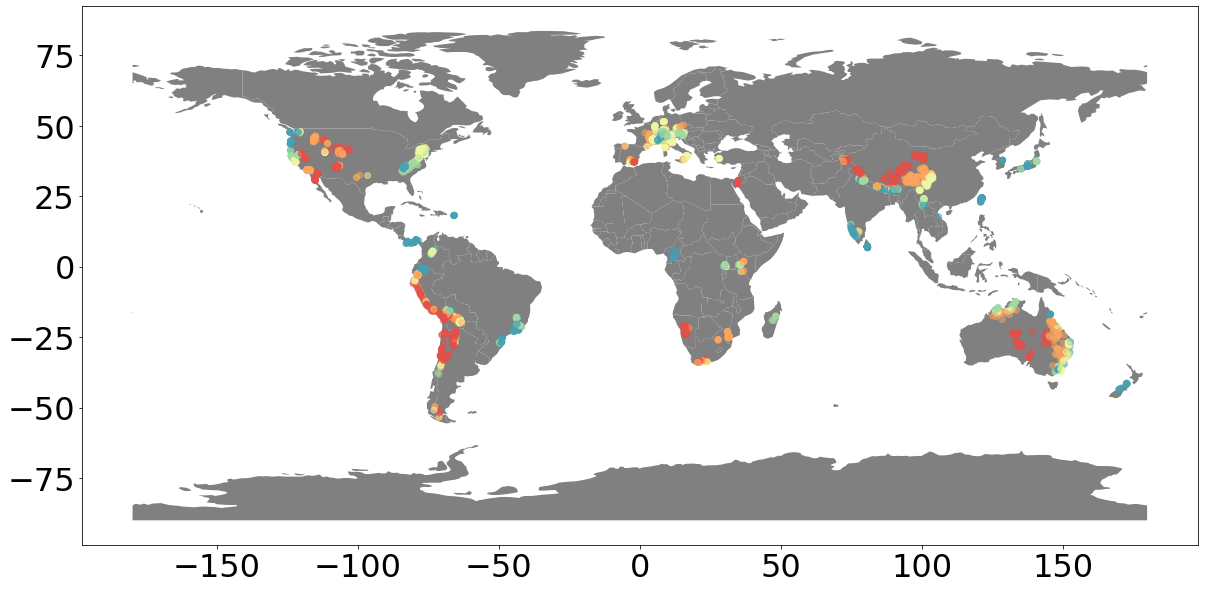

In [391]:
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 32})
fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = a['meantempclass']


a2 = a.copy()
a2.geometry = a.geometry.centroid


a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("Spectral").as_hex()[:7]),alpha=.5)
#plt.imshow(f)

In [677]:
## tectonic regimes
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

t = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/tectonic_region/')
a['meantempclass'] = -1
mt1 = np.zeros(len(a))
for i in range(len(a)):
    try:
        mt1[i] = t.index[t.contains(a.geometry[i].centroid)][0]
    except:
        continue
a['meantempclass'] = np.int32(mt1)

In [678]:
t.index = np.arange(len(t))
a.index = np.arange(len(a))
regions = t['region'][a['meantempclass']]
regions.index = np.arange(len(regions))
a['region'] = regions
a['id'] = range(len(a))

In [690]:
## Unique cross-validation type thing
a.index = range(len(a))
a['meantempclass'] = pd.qcut(a.rank(method='first').x_wgs84,711,duplicates='drop')
a.index = range(len(a))

In [691]:
c=0
a['id'] = range(len(a))
groups = np.zeros((1000,1000))
bslen=[]
for i,b in a.groupby('meantempclass'):
    for j in range(len(b)):
        groups[c,j] = np.int32(b.iloc[j]['id'])
    bslen.append(len(b))
    c+=1



In [692]:
m,n = np.shape(groups)
a['meantempclass'] =0
for i in range(0,m):
    for j in range(0,n):
        if groups[i,j] > 0:
            a['meantempclass'][groups[i,j]] = j
## end cross validation

<ipython-input-692-b30c46749132>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][groups[i,j]] = j
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
import seaborn as sns
plt.subplots(figsize=(10,7))
sns.histplot(data=a,x='bio10',log_scale = False, hue='meantempclass')
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [694]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 35#3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [695]:
from sklearn import linear_model as lm
import sklearn
n = 0
r2s = [None] * len(a['meantempclass'].unique())
mntemp = np.zeros(len(r2s))
abox = pd.DataFrame()
abox['index'] = np.arange(len(eros1[1])*len(a['meantempclass'].unique()))
abox['r2s'] = 0
abox['drat'] = 0
abox['n'] = 0
abox['m/n'] = 0
abox['class'] = 0
abox['drat'] = 0
abox['dratave'] = 0
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

mt = a['meantempclass'].unique()
c=0
for li in range(len(a['meantempclass'].unique())):
    ids = a.index[a['meantempclass'] == a['meantempclass'].unique()[li]]
    
    r2s[li] = np.zeros(len(eros1[1]))
    resid = np.zeros(len(eros1[1]))
    pcoef = np.zeros(len(eros1[1]))
    ks2 = ns.copy()#ks.copy()
    diffus2 = diffus.copy()
    try:
        mntemp[li] = np.mean(a['bio1'][ids])
    except:
        'meh'

    for i in range(len(eros1[1])):#range(len(ms)):
            if dfs[i][ids] is None:
                continue
            
            y = np.log(np.float64(a['ebe_mmkyr'][ids])/1000)
            x = np.log(dfs[i][ids])
            print(len(x[x>0]))
            #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
            #x=x[I_min]
            #y=y[I_min]

            xi = x.copy()
            I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
            x=np.delete(x,I)
            y=np.delete(y,I)
            I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
            x = np.delete(x,I2)
            y = np.delete(y,I2)
            
            
            l1  = lm.LinearRegression(fit_intercept=False)
            l = lm.LinearRegression(fit_intercept=False)
            if len(x[np.logical_not(np.isnan(x))])>50:
                
                    #print(a.loc[ids[0],'meantempclass'])
                    p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                    p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
                    
                    intercept =np.mean(y-x)
                    y2 = x+intercept
                  #  ####
                   # if 1:
                       # x = x[ y2 > -4 ]

                       # y = y[ y2 > -4 ]
                       # y2 = y2[y2>-4]
                    ####
                   # y2 = p.predict(x.reshape(-1,1))
                    y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                    r2s[li][i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                    diffus2[i] *= p1.coef_
                    #ks2[i] *= p1.coef_
                    resid[i] = np.mean(np.abs(np.exp(y.ravel())-y3.ravel()))
                    print(len(y[np.logical_not(np.isnan(x))]))
                    pcoef[i] = p1.coef_
                    
                    abox.loc[c,'r2s'] = r2s[li][i]
                    abox.loc[c,'meantempclass'] = li#
                    abox.loc[c,'class'] = mt[li]
                    abox.loc[c,'n'] = ns[i]
                    abox.loc[c,'D/k'] = diffus[i] / ks[i]
                    abox.loc[c,'Diffusion/total'] = dratave[i] 
                    abox.loc[c,'m/n'] = ms[i] / ns[i]

                    c=c+1
    #abox.loc[ids,''] = r2s[li]

                   # if resid[i]>127.9:
                    #    break
#a['maxr2s'] = dfs[np.argmax('elev_mn')] * pcoef[np.argmax(maxr2s)]


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

1
629
493
629
674
629
274
629
607
629
213
629
210
629
153
629
674
629
674
629
0
629
674
629
0
629
673
629
512
629
661
629
674
629
674
629
620
629
0
629
673
629
0
629
640
629
674
629
640
629
674
629
0
629
673
629
43
629
658
629
418
629
45
629
583
629
638
629
674
629
663
629
611
629
674
629
645
629
674
629
0
629
674
629
674
629
653
629
674
629
674
629
622
629
0
629
674
629
0
629
674
629
0
629
672
629
673
629
1
629
0
629
556
629
32
629
128
629
0
629
0
629
0
629
625
629
6
629
674
629
673
629
0
629
0
629
646
629
581
629
673
629
517
629
674
629
309
629
0
629
674
629
652
629
624
629
669
629
0
629
0
629
674
629
674
629
674
629
377
629
674
629
674
629
624
629
674
629
76
629
674
629
613
629
674
629
674
629
655
629
0
629
0
629
0
629
360


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

629
599
629
674
629
652
629
674
629
51
629
672
629
0
629
674
629
674
629
104
629
674
629
492
629
0
629
674
629
0
629
674
629
0
629
0
629
674
629
607
629
674
629
229
629
611
629
0
629
674
629
339
629
606
629
664
629
673
629
654
629
646
629
674
629
0
629
631
629
4
629
673
629
0
629
0
629
0
629
658
629
0
629
0
629
674
629
0
629
163
629
0
629
673
629
625
629
673
629
0
629
545
629
674
629
71
629
674
629
0
629
666
629
80
629
674
629
670
629
383
629
674
629
0
629
61
629
590
629
674
629
631
629
587
629
674
629
674
629
673
629
674
629
674
629
674
629
448
629
674
629
674
629
0
629
672
629
0
629
672
629
640
629
0
629
0
629
0
629
0
629
170
629
650
629
0
629
80
629
672
629
674
629
525
629
0
629
674
629
674
629
673
629
628
629
0
629
645
629
603
629
434
629
674
629


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

674
629
1
629
0
629
674
629
674
629
674
629
640
629
672
629
631
629
674
629
674
629
674
629
674
629
257
629
0
629
674
629
635
629
93
629
0
629
0
629
674
629
674
629
674
629
567
629
106
629
674
629
674
629
0
629
674
629
0
629
0
629
0
629
0
629
108
629
674
629
674
629
632
629
674
629
305
629
674
629
674
629
673
629
657
629
659
629
0
629
0
629
674
629
0
629
674
629
179
629
605
629
674
629
674
629
624
629
554
629
654
629
673
629
0
629
674
629
0
629
674
629
0
629
620
629
673
629
674
629
673
629
672
629
443
629
488
629
672
629
1
629
0
629
633
629
674
629
578
629
22
629
650
629
674
629
672
629
674
629
674
629
674
629
674
629
674
629
674
629
0
629
674
629
0
629
674
629
674
629
673
629
674
629
216
629
439
629
654
629
674
629
0
629
590
629
674
629
0
629
0
629
658
629
2
629
674
629
643
629
0
629
647
629
674
629


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

626
629
674
629
673
629
651
629
350
629
674
629
655
629
620
629
668
629
645
629
653
629
200
629
670
629
674
629
0
629
96
629
0
629
674
629
674
629
0
629
50
629
140
629
674
629
674
629
666
629
0
629
674
629
674
629
673
629
674
629
0
629
0
629
674
629
12
629
558
629
654
629
674
629
674
629
0
629
674
629
0
629
674
629
674
629
99
629
649
629
493
629
672
629
513
629
549
629
674
629
0
629
674
629
0
629
0
629
673
629
674
629
397
629
645
629
651
629
674
629
674
629
674
629
0
629
0
629
488
629
0
629
674
629
631
629
611
629
646
629
673
629
674
629
0
629
0
629
0
629
674
629
0
629
0
629
414
629
0
629
0
629
104
629
573
629
674
629
671
629
0
629
670
629
0
629
674
629
0
629
616
629
650
629
674
629
8
629
647
629
674
629
0
629
674
629
674
629
157
629
674
629
673
629
543
629

<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.


651
629
674
629
674
629
0
629
674
629
674
629
674
629
674
629
0
629
674
629
640
629
674
629
674
629
626
629
0
629
674
629
608
629
674
629
674
629
643
629
0
629
632
629
589
629
284
629
0
629
0
629
674
629
674
629
674
629
588
629
654
629
674
629
673
629
674
629
2
629
421
629
674
629
27
629
674
629
674
629
640
629
668
629
0
629
608
629
674
629
674
629
654
629
674
629
646
629
674
629
288
629
650
629
312
629
673
629
669
629
656
629
559
629
607
629
674
629
674
629
611
629
674
629
201
629
674
629
674
629
674
629
673
629
674
629
674
629
624
629
570
629
674
629
0
629
641
629
674
629
674
629
674
629
627
629
0
629
674
629
674
629
671
629
674
629
652
629
674
629
674
629
600
629
674
629
0
629
0
629
674
629
0
629
674
629
0
629
374
629
674
629
673
629
674
629
0
629
674
629
674
629
674
629
674
629
674
629


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

674
629
84
629
0
629
0
629
674
629
652
629
665
629
674
629
0
629
611
629
0
629
674
629
674
629
674
629
674
629
175
629
37
629
448
629
462
629
674
629
647
629
674
629
646
629
674
629
674
629
322
629
674
629
674
629
0
629
674
629
672
629
0
629
171
629
428
629
674
629
674
629
624
629
674
629
673
629
502
629
674
629
0
629
640
629
0
629
640
629
647
629
0
629
0
629
643
629
0
629
674
629
0
629
0
629
0
629
674
629
330
629
0
629
0
629
674
629
674
629
674
629
0
629
674
629
28
629
674
629
0
629
0
629
674
629
674
629
654
629
674
629
670
629
0
629
499
629
674
629
674
629
674
629
674
629
622
629
346
629
652
629
659
629
606
629
659
629
673
629
674
629
607
629
646
629
0
629
88
629
674
629
673
629
278
629
674
629
674
629
674
629
674
629
674
629
367
629
0
629
168
629


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

333
629
674
629
647
629
674
629
528
629
0
629
674
629
666
629
0
629
674
629
24
629
0
629
0
629
282
629
673
629
307
629
563
629
674
629
221
629
596
629
674
629
0
629
674
629
674
629
654
629
674
629
459
629
652
629
640
629
551
629
0
629
71
629
654
629
674
629
640
629
610
629
671
629
674
629
674
629
472
629
652
629
0
629
0
629
674
629
0
629
674
629
674
629
674
629
0
629
674
629
673
629
674
629
610
629
0
629
0
629
0
629
674
629
674
629
611
629
0
629
646
629
0
629
674
629
6
629
674
629
393
629
0
629
466
629
242
629
72
629
18
629
674
629
650
629
652
629
0
629
674
629
15
629
674
629
0
629
674
629
611
629
0
629
674
629
673
629
592
629
0
629
88
629
0
629
674
629
674
629
0
629
0
629
0
629
673
629
565
629
0
629
674
629
0
629
674
629
176
629
640
629
0
629
673
629
563
629
673
629
654


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

629
674
629
28
629
0
629
674
629
504
629
0
629
673
629
0
629
15
629
674
629
672
629
622
629
674
629
517
629
673
629
670
629
565
629
436
629
674
629
674
629
674
629
620
629
674
629
0
629
0
629
668
629
0
629
674
629
0
629
674
629
583
629
645
629
674
629
640
629
674
629
615
629
672
629
674
629
622
629
674
629
0
629
674
629
674
629
674
629
674
629
674
629
313
629
674
629
674
629
674
629
674
629
674
629
674
629
0
629
578
629
661
629
674
629
0
629
0
629
674
629
674
629
298
629
0
629
0
629
0
629
674
629
674
629
244
629
673
629
674
629
0
629
0
629
178
629
557
629
674
629
674
629
283
629
0
629
0
629
670
629
1
629
674
629
674
629
580
629
655
629
0
629
603
629
674
629
674
629
674
629
674
629
674
629
674
629
673
629
674
629
662
629
0
629
674
629
263
629
673
629
658
629
367
629
674
629
0
629


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
629
674
629
674
629
0
629
672
629
674
629
674
629
0
629
674
629
672
629
610
629
674
629
654
629
672
629
674
629
0
629
651
629
0
629
674
629
556
629
674
629
644
629
674
629
652
629
0
629
674
629
674
629
174
629
674
629
0
629
611
629
315
629
674
629
602
629
670
629
674
629
0
629
654
629
430
629
3
629
0
629
672
629
303
629
674
629
654
629
0
629
0
629
0
629
674
629
0
629
219
629
0
629
674
629
0
629
674
629
0
629
402
629
646
629
674
629
645
629
632
629
2
629
590
629
657
629
582
629
482
629
0
629
575
629
652
629
673
629
674
629
0
629
640
629
515
629
0
629
65
629
674
629
607
629
433
629
45
629
285
629
674
629
674
629
650
629
576
629
0
629
674
629
0
629
674
629
0
629
674
629
0
629
674
629
0
629
0
629
246
629
666
629
611
629
674
629
674
629
674
629
176
629
674
629
674


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

629
674
629
673
629
263
629
544
629
622
629
282
629
674
629
674
629
611
629
607
629
301
629
526
629
673
629
61
629
21
629
623
629
284
629
50
629
0
629
153
629
243
629
674
629
673
629
0
629
674
629
673
629
0
629
674
629
0
629
244
629
674
629
648
629
662
629
538
629
0
629
670
629
0
629
611
629
0
629
0
629
520
629
674
629
674
629
543
629
637
629
610
629
640
629
674
629
648
629
674
629
651
629
674
629
614
629
673
629
674
629
644
629
530
629
674
629
0
629
674
629
674
629
0
629
655
629
0
629
674
629
674
629
674
629
599
629
674
629
0
635
529
635
688
635
296
635
606
635
181
635
222
635
159
635
688
635
688
635
0
635
688
635
0
635
688
635
494
635
670
635
688
635
688
635
622
635
0
635
688
635
0
635
659
635
688
635
658
635
688
635
0
635
688
635
31
635
672
635
423
635
45
635
564
635
645
635
688
635
678
635
632


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

635
688
635
660
635
688
635
0
635
688
635
688
635
667
635
688
635
688
635
629
635
0
635
688
635
0
635
688
635
0
635
686
635
688
635
1
635
0
635
530
635
25
635
99
635
0
635
0
635
0
635
633
635
13
635
688
635
687
635
0
635
0
635
654
635
563
635
688
635
543
635
688
635
287
635
0
635
688
635
666
635
630
635
683
635
0
635
0
635
688
635
688
635
688
635
375
635
688
635
688
635
630
635
688
635
53
635
688
635
618
635
688
635
688
635
668
635
0
635
0
635
0
635
352
635
591
635
688
635
665
635
688
635
39
635
687
635
0
635
688
635
688
635
78
635
688
635
467
635
0
635
688
635
0
635
688
635
0
635
0
635
688
635
602
635
688
635
188
635
613
635
0
635
688
635
310
635
628
635
678
635
688
635
666
635
661
635
688
635
0
635
641
635
11
635
688
635
0
635
0
635
0
635
664
635
0
635
0
635
688
635
0
635
133


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

635
0
635
687
635
633
635
688
635
0
635
546
635
688
635
90
635
688
635
0
635
677
635
94
635
688
635
683
635
392
635
688
635
0
635
43
635
580
635
688
635
641
635
570
635
688
635
688
635
688
635
688
635
688
635
688
635
422
635
688
635
688
635
0
635
685
635
0
635
687
635
657
635
0
635
0
635
0
635
0
635
138
635
663
635
0
635
56
635
686
635
688
635
503
635
0
635
688
635
688
635
688
635
635
635
0
635
660
635
599
635
438
635
688
635
688
635
1
635
0
635
688
635
688
635
688
635
657
635
687
635
641
635
688
635
688
635
688
635
688
635
269
635
0
635
688
635
643
635
69
635
0
635
0
635
688
635
688
635
688
635
536
635
83
635
688
635
688
635
0
635
688
635
0
635
0
635
0
635
0
635
82
635
688
635
688
635
643
635
688
635
284
635
688
635
688
635
687
635
659
635
665
635
0
635
0
635
688


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

635
0
635
688
635
144
635
598
635
688
635
688
635
630
635
567
635
667
635
688
635
0
635
688
635
0
635
688
635
0
635
625
635
688
635
688
635
688
635
687
635
415
635
513
635
687
635
0
635
0
635
646
635
688
635
560
635
18
635
664
635
688
635
687
635
688
635
688
635
688
635
688
635
688
635
688
635
0
635
688
635
0
635
688
635
688
635
688
635
688
635
225
635
411
635
668
635
688
635
0
635
578
635
688
635
0
635
0
635
664
635
3
635
688
635
653
635
0
635
661
635
688
635
639
635
688
635
688
635
664
635
323
635
688
635
667
635
623
635
681
635
660
635
665
635
174
635
684
635
688
635
0
635
76
635
0
635
688
635
688
635
0
635
62
635
116
635
688
635
688
635
682
635
0
635
688
635
688
635
688
635
688
635
0
635
0
635
688
635
6
635
533
635
666
635
688
635
688
635
0
635
688
635
0


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

635
688
635
688
635
77
635
662
635
529
635
687
635
491
635
554
635
688
635
0
635
688
635
0
635
0
635
688
635
688
635
372
635
657
635
665
635
688
635
688
635
688
635
0
635
0
635
471
635
0
635
688
635
638
635
610
635
660
635
688
635
688
635
0
635
0
635
0
635
688
635
0
635
0
635
381
635
0
635
0
635
112
635
551
635
688
635
686
635
0
635
683
635
0
635
688
635
0
635
618
635
662
635
688
635
6
635
662
635
688
635
0
635
688
635
688
635
125
635
688
635
687
635
515
635
664
635
688
635
688
635
0
635
688
635
688
635
688
635
688
635
0
635
688
635
657
635
688
635
688
635
634
635
0
635
688
635
617
635
688
635
688
635
653
635
0
635
643
635
577
635
314
635
0
635
0
635
688
635
688
635
688
635
573
635
671
635
688
635
688
635
688
635
2
635
404
635
688
635
23
635
688
635
688
635
657
635
682
635


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
635
609
635
688
635
688
635
667
635
688
635
654
635
688
635
259
635
663
635
290
635
688
635
684
635
670
635
535
635
600
635
688
635
688
635
604
635
688
635
162
635
688
635
688
635
688
635
688
635
688
635
688
635
630
635
593
635
688
635
0
635
658
635
688
635
688
635
688
635
636
635
0
635
688
635
688
635
684
635
688
635
666
635
688
635
688
635
592
635
688
635
0
635
0
635
688
635
0
635
688
635
0
635
351
635
688
635
688
635
688
635
0
635
688
635
688
635
688
635
688
635
688
635
688
635
64
635
0
635
0
635
688
635
665
635
681
635
688
635
0
635
604
635
0
635
688
635
688
635
688
635
688
635
190
635
29
635
424
635
436
635
688
635
662
635
688
635
660
635
688
635
688
635
293
635
688
635
688
635
0
635
688
635
686
635
0
635
138
635
396
635
688
635
688
635
630
635
688
635
687
635
478
635
688
635
0


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

635
657
635
0
635
654
635
662
635
0
635
0
635
653
635
0
635
688
635
0
635
0
635
0
635
688
635
302
635
0
635
0
635
688
635
688
635
688
635
0
635
688
635
23
635
688
635
0
635
0
635
688
635
688
635
667
635
688
635
684
635
0
635
534
635
688
635
688
635
688
635
688
635
627
635
317
635
665
635
665
635
599
635
665
635
688
635
688
635
600
635
654
635
0
635
65
635
688
635
688
635
244
635
688
635
688
635
688
635
688
635
688
635
347
635
0
635
136
635
302
635
688
635
660
635
688
635
561
635
0
635
688
635
682
635
0
635
688
635
21
635
0
635
0
635
245
635
687
635
284
635
537
635
688
635
180
635
588
635
688
635
0
635
688
635
688
635
667
635
688
635
468
635
665
635
658
635
524
635
0
635
46
635
669
635
688
635
660
635
604
635
686
635
688
635
688
635
448
635
665
635
0
635
0
635
688
635
0
635


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

688
635
688
635
688
635
0
635
688
635
688
635
688
635
603
635
0
635
0
635
0
635
688
635
688
635
605
635
0
635
660
635
0
635
688
635
13
635
688
635
365
635
0
635
489
635
213
635
90
635
29
635
688
635
664
635
666
635
0
635
688
635
23
635
688
635
0
635
688
635
604
635
0
635
688
635
687
635
615
635
0
635
65
635
0
635
688
635
688
635
0
635
0
635
0
635
688
635
588
635
0
635
688
635
0
635
688
635
147
635
658
635
0
635
688
635
537
635
688
635
667
635
688
635
20
635
0
635
688
635
481
635
0
635
688
635
0
635
24
635
688
635
687
635
628
635
688
635
495
635
688
635
683
635
537
635
440
635
688
635
688
635
688
635
621
635
688
635
0
635
0
635
682
635
0
635
688
635
0
635
688
635
564
635
661
635
688
635
658
635


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

688
635
627
635
685
635
688
635
628
635
688
635
0
635
688
635
688
635
688
635
688
635
688
635
290
635
688
635
688
635
688
635
688
635
688
635
688
635
0
635
600
635
668
635
688
635
0
635
0
635
688
635
688
635
273
635
0
635
0
635
0
635
688
635
688
635
255
635
688
635
688
635
0
635
0
635
186
635
585
635
688
635
688
635
255
635
0
635
0
635
684
635
1
635
688
635
688
635
563
635
669
635
0
635
597
635
688
635
688
635
688
635
688
635
688
635
688
635
687
635
688
635
670
635
0
635
688
635
233
635
687
635
662
635
344
635
688
635
0
635
0
635
688
635
688
635
0
635
686
635
688
635
688
635
0
635
688
635
687
635
612
635
688
635
666
635
685
635
688
635
0
635
664
635
0
635
688
635
582
635
688
635
660
635
688
635
668
635
0
635
688
635
688
635
139
635
688
635
0
635
604
635
292
635
688
635
598


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

635
683
635
688
635
0
635
667
635
396
635
9
635
0
635
687
635
283
635
688
635
667
635
0
635
0
635
0
635
688
635
0
635
228
635
0
635
688
635
0
635
688
635
0
635
376
635
660
635
688
635
660
635
643
635
3
635
611
635
670
635
576
635
513
635
0
635
550
635
665
635
688
635
688
635
0
635
654
635
495
635
0
635
45
635
688
635
600
635
398
635
32
635
262
635
688
635
688
635
664
635
559
635
0
635
688
635
0
635
688
635
0
635
688
635
0
635
688
635
0
635
0
635
234
635
681
635
608
635
688
635
688
635
688
635
139
635
688
635
688
635
688
635
688
635
235
635
515
635
627
635
248
635
688
635
688
635
604
635
600
635
276
635
505
635
688
635
43
635
16
635
631
635
314
635
62
635
0
635
121
635
213
635
688
635
688
635
0
635
688
635
688
635
0
635
688
635
0
635
215
635
688
635
662
635
676
635
513
635
0
635
683
635
0
635
606


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

635
0
635
0
635
500
635
688
635
688
635
515
635
649
635
631
635
656
635
688
635
655
635
688
635
664
635
688
635
618
635
687
635
688
635
660
635
562
635
688
635
0
635
688
635
688
635
0
635
667
635
0
635
688
635
688
635
688
635
591
635
688
635
1
638
525
638
689
638
274
638
585
638
150
638
208
638
144
638
689
638
689
638
0
638
689
638
0
638
689
638
489
638
680
638
689
638
689
638
615
638
0
638
689
638
0
638
662
638
689
638
661
638
689
638
0
638
689
638
24
638
679
638
423
638
36
638
534
638
651
638
689
638
685
638
638
638
689
638
665
638
689
638
0
638
689
638
689
638
675
638
689
638
689
638
623
638
0
638
689
638
0
638
689
638
0
638
688
638
689
638
0
638
0
638
510
638
21
638
81
638
0
638
0
638
0
638
626
638
10
638
689
638
689
638
0
638
0
638
661
638
534
638
689


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

638
547
638
689
638
265
638
0
638
689
638
674
638
626
638
688
638
0
638
0
638
689
638
689
638
689
638
351
638
689
638
689
638
624
638
689
638
41
638
689
638
603
638
689
638
689
638
674
638
0
638
0
638
0
638
329
638
564
638
689
638
673
638
689
638
32
638
688
638
0
638
689
638
689
638
68
638
689
638
460
638
0
638
689
638
0
638
689
638
0
638
0
638
689
638
572
638
689
638
167
638
598
638
0
638
689
638
289
638
633
638
685
638
689
638
675
638
665
638
689
638
0
638
639
638
4
638
689
638
0
638
0
638
0
638
673
638
0
638
0
638
689
638
0
638
103
638
0
638
689
638
626
638
689
638
0
638
544
638
689
638
77
638
689
638
0
638
684
638
82
638
689
638
688
638
397
638
689
638
0
638
33
638
548
638
689
638
638
638
550
638
689
638
689
638
689
638
689
638
689
638
689
638
420


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

638
689
638
689
638
0
638
688
638
0
638
689
638
661
638
0
638
0
638
0
638
0
638
114
638
671
638
0
638
42
638
688
638
689
638
489
638
0
638
689
638
689
638
689
638
631
638
0
638
665
638
573
638
435
638
689
638
689
638
0
638
0
638
689
638
689
638
689
638
661
638
689
638
639
638
689
638
689
638
689
638
689
638
256
638
0
638
689
638
646
638
54
638
0
638
0
638
689
638
689
638
689
638
520
638
70
638
689
638
689
638
0
638
689
638
0
638
0
638
0
638
0
638
71
638
689
638
689
638
646
638
689
638
262
638
689
638
689
638
689
638
670
638
675
638
0
638
0
638
689
638
0
638
689
638
117
638
569
638
689
638
689
638
625
638
570
638
677
638
689
638
0
638
689
638
0
638
689
638
0
638
615
638
689
638
689
638
689
638
688
638
410
638
517
638
689
638
2
638
0
638
642
638
689
638
533
638
14
638
672
638


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

689
638
688
638
689
638
689
638
689
638
689
638
689
638
689
638
0
638
689
638
0
638
689
638
689
638
689
638
689
638
212
638
401
638
676
638
689
638
0
638
548
638
689
638
0
638
0
638
675
638
1
638
689
638
658
638
0
638
670
638
689
638
640
638
689
638
689
638
673
638
308
638
689
638
675
638
615
638
687
638
665
638
673
638
147
638
688
638
689
638
0
638
61
638
0
638
689
638
689
638
0
638
49
638
90
638
689
638
689
638
688
638
0
638
689
638
689
638
689
638
689
638
0
638
0
638
689
638
5
638
510
638
675
638
689
638
689
638
0
638
689
638
0
638
689
638
689
638
67
638
671
638
525
638
688
638
473
638
553
638
689
638
0
638
689
638
0
638
0
638
689
638
689
638
353
638
654
638
672
638
689
638
689
638
689
638
0
638
0
638
460
638
0
638
689
638
634
638
595
638
667
638
689
638
689
638
0
638
0
638
0
638
689
638


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
638
0
638
366
638
0
638
0
638
102
638
530
638
689
638
688
638
0
638
688
638
0
638
689
638
0
638
610
638
671
638
689
638
3
638
671
638
689
638
0
638
689
638
689
638
96
638
689
638
689
638
501
638
672
638
689
638
689
638
0
638
689
638
689
638
689
638
689
638
0
638
689
638
661
638
689
638
689
638
631
638
0
638
689
638
611
638
689
638
689
638
659
638
0
638
644
638
547
638
293
638
0
638
0
638
689
638
689
638
689
638
548
638
676
638
689
638
689
638
689
638
0
638
394
638
689
638
16
638
689
638
689
638
661
638
688
638
0
638
589
638
689
638
689
638
677
638
689
638
661
638
689
638
234
638
671
638
270
638
689
638
688
638
677
638
515
638
571
638
689
638
689
638
581
638
689
638
139
638
689
638
689
638
689
638
689
638
689
638
689
638
625
638
595
638
689
638
0


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

638
662
638
689
638
689
638
689
638
636
638
0
638
689
638
689
638
688
638
689
638
673
638
689
638
689
638
564
638
689
638
0
638
0
638
689
638
0
638
689
638
0
638
326
638
689
638
689
638
689
638
0
638
689
638
689
638
689
638
689
638
689
638
689
638
48
638
0
638
0
638
689
638
673
638
687
638
689
638
0
638
583
638
0
638
689
638
689
638
689
638
689
638
181
638
24
638
419
638
425
638
689
638
671
638
689
638
667
638
689
638
689
638
278
638
689
638
689
638
0
638
689
638
688
638
0
638
113
638
385
638
689
638
689
638
625
638
689
638
689
638
464
638
689
638
0
638
661
638
0
638
657
638
670
638
0
638
0
638
658
638
0
638
689
638
0
638
0
638
0
638
689
638
284
638
0
638
0
638
689
638
689
638
689
638
0
638
689
638
17


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

638
689
638
0
638
0
638
689
638
689
638
677
638
689
638
688
638
0
638
531
638
689
638
689
638
689
638
689
638
621
638
300
638
673
638
675
638
570
638
675
638
689
638
689
638
572
638
661
638
0
638
50
638
689
638
689
638
224
638
689
638
689
638
689
638
689
638
689
638
323
638
0
638
107
638
284
638
689
638
669
638
689
638
568
638
0
638
689
638
688
638
0
638
689
638
14
638
0
638
0
638
228
638
689
638
263
638
517
638
689
638
155
638
569
638
689
638
0
638
689
638
689
638
677
638
689
638
470
638
673
638
661
638
508
638
0
638
37
638
676
638
689
638
664
638
577
638
688
638
689
638
689
638
434
638
673
638
0
638
0
638
689
638
0
638
689
638
689
638
689
638
0
638
689
638
689
638
689
638
581
638
0
638


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
638
0
638
689
638
689
638
582
638
0
638
665
638
0
638
689
638
10
638
689
638
342
638
0
638
487
638
186
638
78
638
25
638
689
638
671
638
673
638
0
638
689
638
14
638
689
638
0
638
689
638
581
638
0
638
689
638
689
638
624
638
0
638
51
638
0
638
689
638
689
638
0
638
0
638
0
638
689
638
593
638
0
638
689
638
0
638
689
638
122
638
661
638
0
638
689
638
517
638
689
638
677
638
689
638
16
638
0
638
689
638
469
638
0
638
689
638
0
638
14
638
689
638
688
638
623
638
689
638
480
638
689
638
688
638
519
638
442
638
689
638
689
638
689
638
613
638
689
638
0
638
0
638
688
638
0
638
689
638
0
638
689
638
534
638
666
638
689
638
661
638
689
638
610
638
688
638
689
638
623
638
689
638
0
638
689
638
689
638
689
638
689
638
689
638
271
638
689
638
689
638
689
638
689


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

638
689
638
689
638
0
638
605
638
676
638
689
638
0
638
0
638
689
638
689
638
256
638
0
638
0
638
0
638
689
638
689
638
246
638
689
638
689
638
0
638
0
638
173
638
587
638
689
638
689
638
231
638
0
638
0
638
688
638
0
638
689
638
689
638
534
638
677
638
0
638
567
638
689
638
689
638
689
638
689
638
689
638
689
638
689
638
689
638
680
638
0
638
689
638
218
638
689
638
673
638
321
638
689
638
0
638
0
638
689
638
689
638
0
638
688
638
689
638
689
638
0
638
689
638
689
638
597
638
689
638
675
638
688
638
689
638
0
638
672
638
0
638
689
638
586
638
689
638
665
638
689
638
675
638
0
638
689
638
689
638
111
638
689
638
0
638
580
638
277
638
689
638
575
638
688
638
689
638
0
638
677
638
387
638
3
638
0
638
688
638
261
638
689
638
677
638
0
638
0
638
0
638
689
638
0
638
215
638


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
638
689
638
0
638
689
638
0
638
361
638
665
638
689
638
665
638
646
638
1
638
617
638
678
638
569
638
515
638
0
638
526
638
673
638
689
638
689
638
0
638
656
638
475
638
0
638
34
638
689
638
571
638
389
638
24
638
242
638
689
638
689
638
672
638
533
638
0
638
689
638
0
638
689
638
0
638
689
638
0
638
689
638
0
638
0
638
210
638
687
638
589
638
689
638
689
638
689
638
111
638
689
638
689
638
689
638
689
638
219
638
504
638
621
638
228
638
689
638
689
638
581
638
572
638
260
638
489
638
689
638
32
638
12
638
626
638
293
638
50
638
0
638
95
638
189
638
689
638
689
638
0
638
689
638
689
638
0
638
689
638
0
638
192
638
689
638
671
638
683
638
499
638
0
638
688
638
0
638
583
638
0
638
0
638
487
638
689
638
689
638
503
638
652
638
637
638
659
638
689
638
664
638


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

689
638
672
638
689
638
608
638
689
638
689
638
664
638
569
638
689
638
0
638
689
638
689
638
0
638
677
638
0
638
689
638
689
638
689
638
564
638
689
638
1
643
531
643
689
643
289
643
593
643
157
643
221
643
166
643
689
643
689
643
0
643
689
643
0
643
686
643
482
643
676
643
689
643
689
643
619
643
0
643
686
643
0
643
654
643
687
643
651
643
689
643
0
643
686
643
17
643
679
643
427
643
41
643
538
643
655
643
689
643
684
643
644
643
687
643
659
643
687
643
0
643
689
643
689
643
674
643
689
643
689
643
622
643
0
643
689
643
0
643
689
643
0
643
686
643
686
643
0
643
0
643
505
643
17
643
66
643
0
643
0
643
0
643
629
643
20
643
689
643
686
643
0
643
0
643
660
643
538
643
686
643
551
643
689
643
250
643
0
643
689
643
671
643
628
643
686
643
0
643
0
643
689
643
689
643
687
643
359
643
689
643
689
643
626
643
689


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

643
35
643
689
643
611
643
689
643
687
643
676
643
0
643
0
643
0
643
337
643
566
643
689
643
671
643
689
643
30
643
686
643
0
643
689
643
687
643
52
643
689
643
441
643
0
643
689
643
0
643
689
643
0
643
0
643
689
643
585
643
687
643
167
643
609
643
0
643
689
643
280
643
636
643
683
643
686
643
672
643
663
643
689
643
0
643
642
643
17
643
686
643
0
643
0
643
0
643
672
643
0
643
0
643
689
643
0
643
92
643
0
643
686
643
632
643
686
643
0
643
546
643
689
643
82
643
689
643
0
643
679
643
87
643
689
643
686
643
394
643
689
643
0
643
26
643
549
643
689
643
641
643
560
643
689
643
689
643
686
643
689
643
689
643
689
643
400
643
689
643
686
643
0
643
686
643
0
643
686
643
649
643
0
643
0
643
0
643
0
643
112
643
671
643
0
643
35
643
686
643
689
643
471
643

<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.


0
643
687
643
689
643
686
643
637
643
0
643
657
643
583
643
444
643
689
643
689
643
0
643
0
643
689
643
689
643
689
643
649
643
686
643
642
643
687
643
689
643
689
643
688
643
273
643
0
643
689
643
653
643
45
643
0
643
0
643
689
643
689
643
689
643
512
643
55
643
689
643
689
643
0
643
689
643
0
643
0
643
0
643
0
643
53
643
689
643
689
643
645
643
689
643
248
643
687
643
689
643
686
643
670
643
675
643
0
643
0
643
687
643
0
643
688
643
109
643
578
643
689
643
687
643
627
643
578
643
673
643
686
643
0
643
689
643
0
643
689
643
0
643
620
643
686
643
689
643
686
643
686
643
395
643
513
643
686
643
2
643
0
643
641
643
689
643
529
643
10
643
671
643
689
643
686
643
689
643
689
643
689
643
689
643
689
643
689
643
0
643
689
643
0
643
689
643
687
643
686
643


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

689
643
223
643
390
643
677
643
689
643
0
643
548
643
687
643
0
643
0
643
673
643
3
643
689
643
658
643
0
643
668
643
689
643
652
643
689
643
686
643
671
643
288
643
689
643
673
643
617
643
684
643
659
643
671
643
152
643
686
643
687
643
0
643
47
643
0
643
689
643
689
643
0
643
62
643
78
643
689
643
689
643
685
643
0
643
689
643
689
643
686
643
689
643
0
643
0
643
686
643
5
643
507
643
672
643
689
643
689
643
0
643
689
643
0
643
689
643
689
643
49
643
671
643
531
643
686
643
460
643
553
643
689
643
0
643
689
643
0
643
0
643
686
643
686
643
351
643
658
643
671
643
689
643
687
643
689
643
0
643
0
643
449
643
0
643
689
643
639
643
607
643
661
643
686
643
689
643
0
643
0
643
0
643
689
643
0
643
0
643
362
643
0
643
0
643
113
643
526
643
689
643
686
643
0
643
685


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

643
0
643
689
643
0
643
615
643
671
643
689
643
4
643
670
643
689
643
0
643
689
643
687
643
89
643
689
643
686
643
492
643
671
643
689
643
689
643
0
643
689
643
689
643
688
643
689
643
0
643
689
643
650
643
689
643
689
643
635
643
0
643
689
643
618
643
689
643
689
643
658
643
0
643
645
643
550
643
308
643
0
643
0
643
689
643
689
643
689
643
559
643
676
643
689
643
686
643
689
643
3
643
391
643
689
643
10
643
688
643
689
643
649
643
685
643
0
643
601
643
689
643
689
643
673
643
689
643
660
643
689
643
229
643
671
643
255
643
686
643
686
643
677
643
508
643
580
643
689
643
689
643
594
643
689
643
142
643
687
643
689
643
689
643
686
643
687
643
689
643
627
643
607
643
689
643
0
643
658
643
689
643
687
643
689
643
637
643
0
643
689
643
687
643
686
643
689
643
671
643
689
643
689
643
567
643
687


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

643
0
643
0
643
689
643
0
643
689
643
0
643
312
643
689
643
686
643
689
643
0
643
689
643
689
643
689
643
689
643
687
643
689
643
40
643
0
643
0
643
689
643
671
643
683
643
689
643
0
643
598
643
0
643
689
643
687
643
689
643
689
643
193
643
17
643
401
643
410
643
689
643
669
643
689
643
660
643
689
643
689
643
258
643
689
643
689
643
0
643
686
643
686
643
0
643
103
643
381
643
689
643
689
643
627
643
689
643
686
643
454
643
687
643
0
643
649
643
0
643
649
643
669
643
0
643
0
643
658
643
0
643
689
643
0
643
0
643
0
643
689
643
274
643
0
643
0
643
689
643
689
643
689
643
0
643
689
643
13
643
687
643
0
643
0
643
689
643
689
643
673
643
689
643
686
643
0
643
537
643
689
643
689
643
689
643
689
643
623
643
286
643
671
643
675
643
580
643
674
643
686
643
689
643
582
643
660
643


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
643
41
643
689
643
686
643
216
643
689
643
689
643
689
643
689
643
687
643
310
643
0
643
97
643
274
643
689
643
667
643
689
643
567
643
0
643
688
643
685
643
0
643
689
643
10
643
0
643
0
643
219
643
686
643
248
643
514
643
689
643
161
643
577
643
688
643
0
643
689
643
689
643
673
643
689
643
470
643
671
643
651
643
500
643
0
643
29
643
677
643
687
643
654
643
589
643
686
643
689
643
689
643
421
643
671
643
0
643
0
643
689
643
0
643
689
643
689
643
689
643
0
643
689
643
686
643
689
643
594
643
0
643
0
643
0
643
689
643
687
643
598
643
0
643
659
643
0
643
689
643
20
643
688
643
342
643
0
643
491
643
187
643
88
643
32
643
689
643
671
643
671
643
0
643
689
643
26
643
689
643
0
643
689
643
595
643
0
643
689
643
686
643
626
643
0
643
42
643
0
643
689
643
689
643
0
643
0
643
0


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

643
686
643
601
643
0
643
689
643
0
643
689
643
127
643
651
643
0
643
686
643
514
643
686
643
673
643
689
643
13
643
0
643
687
643
458
643
0
643
686
643
0
643
27
643
687
643
686
643
623
643
687
643
466
643
686
643
685
643
517
643
445
643
689
643
689
643
689
643
616
643
689
643
0
643
0
643
684
643
0
643
689
643
0
643
689
643
539
643
663
643
689
643
649
643
689
643
618
643
686
643
689
643
623
643
688
643
0
643
689
643
689
643
689
643
689
643
689
643
256
643
689
643
689
643
689
643
689
643
689
643
689
643
0
643
615
643
677
643
688
643
0
643
0
643
689
643
687
643
241
643
0
643
0
643
0
643
689
643
689
643
261
643
686
643
689
643
0
643
0
643
191
643
594
643
689
643
689
643
226
643
0
643
0
643
686
643
0
643
689
643
689
643
538
643
677
643
0
643
570
643
689
643


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

689
643
689
643
689
643
689
643
689
643
686
643
689
643
676
643
0
643
689
643
209
643
686
643
670
643
309
643
689
643
0
643
0
643
689
643
689
643
0
643
686
643
689
643
689
643
0
643
688
643
686
643
607
643
687
643
672
643
686
643
689
643
0
643
671
643
0
643
689
643
593
643
689
643
657
643
687
643
676
643
0
643
689
643
689
643
104
643
689
643
0
643
594
643
258
643
689
643
584
643
686
643
689
643
0
643
673
643
381
643
10
643
0
643
686
643
248
643
687
643
673
643
0
643
0
643
0
643
689
643
0
643
230
643
0
643
689
643
0
643
689
643
0
643
353
643
660
643
689
643
659
643
645
643
5
643
624
643
678
643
580
643
515
643
0
643
524
643
671
643
686
643
689
643
0
643
649
643
464
643
0
643
28
643
689
643
580
643
382
643
17
643
231
643
689
643
687
643
671
643
529
643
0
643
689
643
0
643
688
643
0
643
689
643


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
643
689
643
0
643
0
643
209
643
685
643
604
643
688
643
689
643
689
643
106
643
689
643
689
643
689
643
686
643
209
643
495
643
623
643
220
643
689
643
689
643
595
643
581
643
246
643
477
643
686
643
26
643
8
643
628
643
308
643
62
643
0
643
87
643
189
643
689
643
686
643
0
643
689
643
686
643
0
643
689
643
0
643
189
643
689
643
669
643
681
643
491
643
0
643
685
643
0
643
599
643
0
643
0
643
469
643
689
643
689
643
494
643
649
643
644
643
649
643
689
643
663
643
689
643
671
643
689
643
615
643
686
643
688
643
655
643
570
643
689
643
0
643
687
643
687
643
0
643
673
643
0
643
689
643
689
643
687
643
566
643
689
643
0
653
508
653
697
653
273
653
566
653
127
653
216
653
148
653
697
653
697
653
0
653
697
653
0
653
696
653
458
653
676
653
697
653
697
653
591
653
0
653
696
653


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
653
654
653
697
653
652
653
697
653
0
653
697
653
12
653
682
653
416
653
29
653
509
653
646
653
697
653
690
653
631
653
697
653
663
653
697
653
0
653
697
653
697
653
677
653
697
653
697
653
602
653
0
653
697
653
0
653
697
653
0
653
695
653
695
653
0
653
0
653
470
653
11
653
47
653
0
653
0
653
0
653
613
653
9
653
697
653
694
653
0
653
0
653
655
653
506
653
696
653
532
653
697
653
219
653
0
653
697
653
675
653
612
653
691
653
0
653
0
653
697
653
697
653
697
653
346
653
697
653
697
653
610
653
697
653
27
653
697
653
580
653
697
653
697
653
669
653
0
653
0
653
0
653
321
653
541
653
697
653
675
653
697
653
20
653
694
653
0
653
697
653
697
653
38
653
697
653
412
653
0
653
697
653
0
653
697
653
0
653
0
653
697
653
555
653
697
653
140
653
574
653
0
653
697
653
250
653
626
653
690
653
696
653
676
653
657
653
697
653
0
653
625
653
8
653
696
653
0
653
0
653
0
653
667
653
0
653
0
653
697
653
0
653
72
653
0
653
694
653
616
653
696
653
0
653
522
653
697
653
65
653
697
653
0
653
680
653
70
653
697


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

697
653
0
653
697
653
0
653
0
653
0
653
0
653
41
653
697
653
697
653
634
653
697
653
217
653
697
653
697
653
695
653
666
653
673
653
0
653
0
653
697
653
0
653
697
653
84
653
550
653
697
653
697
653
611
653
559
653
677
653
697
653
0
653
697
653
0
653
697
653
0
653
593
653
696
653
697
653
697
653
694
653
360
653
494
653
694
653
1
653
0
653
625
653
697
653
503
653
10
653
674
653
697
653
695
653
697
653
697
653
697
653
697
653
697
653
697
653
0
653
697
653
0
653
697
653
697
653
697
653
697
653
215
653
353
653
677
653
697
653
0
653
528
653
697
653
0
653
0
653
671
653
3
653
697
653
651
653
0
653
669
653
697
653
635
653
697
653
697
653
675
653
260
653
697
653
677
653
590
653
689
653
663
653
675
653
124
653
691
653
697
653
0
653
37
653
0
653
697
653
697
653


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
653
44
653
61
653
697
653
697
653
688
653
0
653
697
653
697
653
697
653
697
653
0
653
0
653
697
653
3
653
471
653
676
653
697
653
697
653
0
653
697
653
0
653
697
653
697
653
38
653
671
653
508
653
694
653
434
653
534
653
697
653
0
653
697
653
0
653
0
653
696
653
697
653
310
653
642
653
675
653
697
653
697
653
697
653
0
653
0
653
418
653
0
653
697
653
623
653
572
653
664
653
697
653
697
653
0
653
0
653
0
653
697
653
0
653
0
653
324
653
0
653
0
653
91
653
499
653
697
653
694
653
0
653
690
653
0
653
697
653
0
653
586
653
673
653
697
653
2
653
669
653
697
653
0
653
697
653
697
653
69
653
697
653
694
653
458
653
675
653
697
653
697
653
0
653
697
653
697
653
697
653
697
653
0
653
697
653
652
653
697
653
697
653
617
653
0
653
697
653
607
653
697
653
697
653
652
653
0
653
634
653
529
653
290
653
0
653
0
653


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

697
653
697
653
697
653
530
653
673
653
697
653
697
653
697
653
2
653
347
653
697
653
11
653
697
653
697
653
651
653
690
653
0
653
568
653
697
653
697
653
677
653
697
653
654
653
697
653
209
653
673
653
223
653
695
653
691
653
682
653
472
653
553
653
697
653
697
653
558
653
697
653
113
653
697
653
697
653
697
653
696
653
697
653
697
653
611
653
594
653
697
653
0
653
653
653
697
653
697
653
697
653
616
653
0
653
697
653
697
653
692
653
697
653
675
653
697
653
697
653
542
653
697
653
0
653
0
653
697
653
0
653
697
653
0
653
282
653
697
653
695
653
697
653
0
653
697
653
697
653
697
653
697
653
697
653
697
653
32
653
0
653
0
653
697
653
675
653
689
653
697
653
0
653
565
653
0
653
697
653
697
653
697
653
697
653
183
653
12
653
370
653
380
653
697
653
669
653
697
653
664
653
697
653


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

697
653
235
653
697
653
697
653
0
653
697
653
694
653
0
653
79
653
337
653
697
653
697
653
611
653
697
653
694
653
424
653
697
653
0
653
652
653
0
653
648
653
669
653
0
653
0
653
651
653
0
653
697
653
0
653
0
653
0
653
697
653
246
653
0
653
0
653
697
653
697
653
697
653
0
653
697
653
11
653
697
653
0
653
0
653
697
653
697
653
677
653
697
653
691
653
0
653
516
653
697
653
697
653
697
653
697
653
601
653
256
653
675
653
673
653
552
653
672
653
697
653
697
653
555
653
654
653
0
653
34
653
697
653
697
653
188
653
697
653
697
653
697
653
697
653
697
653
277
653
0
653
78
653
247
653
697
653
667
653
697
653
552
653
0
653
697
653
688
653
0
653
697
653
10
653
0
653
0
653
192
653
694
653
217
653
475
653
697
653
129
653
554
653
697
653
0
653
697
653
697
653
677
653
697
653
450
653
675
653
652
653
466
653
0


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

653
25
653
679
653
697
653
655
653
558
653
694
653
697
653
697
653
389
653
675
653
0
653
0
653
697
653
0
653
697
653
697
653
697
653
0
653
697
653
696
653
697
653
559
653
0
653
0
653
0
653
697
653
697
653
562
653
0
653
664
653
0
653
697
653
9
653
697
653
303
653
0
653
463
653
156
653
68
653
22
653
697
653
674
653
675
653
0
653
697
653
17
653
697
653
0
653
697
653
560
653
0
653
697
653
694
653
621
653
0
653
34
653
0
653
697
653
697
653
0
653
0
653
0
653
696
653
587
653
0
653
697
653
0
653
697
653
94
653
652
653
0
653
696
653
475
653
697
653
677
653
697
653
12
653
0
653
697
653
426
653
0
653
697
653
0
653
18
653
697
653
694
653
604
653
697
653
436
653
697
653
690
653
482
653
414
653
697
653
697
653
697
653
590
653


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

697
653
0
653
0
653
690
653
0
653
697
653
0
653
697
653
509
653
662
653
697
653
652
653
697
653
600
653
693
653
697
653
604
653
697
653
0
653
697
653
697
653
697
653
697
653
697
653
225
653
697
653
697
653
697
653
697
653
697
653
697
653
0
653
603
653
672
653
697
653
0
653
0
653
697
653
697
653
213
653
0
653
0
653
0
653
697
653
697
653
247
653
697
653
697
653
0
653
0
653
165
653
579
653
697
653
697
653
204
653
0
653
0
653
691
653
1
653
697
653
697
653
506
653
682
653
0
653
545
653
697
653
697
653
697
653
697
653
697
653
697
653
694
653
697
653
676
653
0
653
697
653
181
653
694
653
669
653
274
653
697
653
0
653
0
653
697
653
697
653
0
653
694
653
697
653
697
653
0
653
697
653
694
653
576
653
697
653
676
653
694
653
697
653
0
653
675
653


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
653
697
653
578
653
697
653
659
653
697
653
677
653
0
653
697
653
697
653
79
653
697
653
0
653
558
653
230
653
697
653
556
653
690
653
697
653
0
653
677
653
339
653
7
653
0
653
695
653
224
653
697
653
677
653
0
653
0
653
0
653
697
653
0
653
222
653
0
653
697
653
0
653
697
653
0
653
313
653
663
653
697
653
663
653
634
653
4
653
616
653
682
653
560
653
489
653
0
653
496
653
675
653
697
653
697
653
0
653
646
653
434
653
0
653
22
653
697
653
552
653
343
653
14
653
208
653
697
653
697
653
674
653
503
653
0
653
697
653
0
653
697
653
0
653
697
653
0
653
697
653
0
653
0
653
184
653
689
653
567
653
697
653
697
653
697
653
79
653
697
653
697
653
697
653
697
653
182
653
462
653
602
653
194
653
697
653
697
653
558
653
555
653
217
653
444
653


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

696
653
19
653
7
653
611
653
290
653
46
653
0
653
66
653
159
653
697
653
695
653
0
653
697
653
696
653
0
653
697
653
0
653
165
653
697
653
670
653
683
653
458
653
0
653
690
653
0
653
562
653
0
653
0
653
439
653
697
653
697
653
460
653
642
653
631
653
649
653
697
653
657
653
697
653
675
653
697
653
585
653
695
653
697
653
657
653
557
653
697
653
0
653
697
653
697
653
0
653
677
653
0
653
697
653
697
653
697
653
541
653
697
653


<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-695-50bfd5647e43>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

In [457]:
lith = 1
if lith:
    a['meantempclass'] = np.load('geo_major.npy',allow_pickle = True)

In [302]:
for c in abox.groupby('class'):
    print(c)

532     2.072902
1579    2.060090
2532    2.072902
3579    2.060090
4579    2.060090
Name: n, dtype: float64


<ipython-input-706-3123438fdf8f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abox['classnm'][r == 146] = classes[0]
<ipython-input-706-3123438fdf8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abox['classnm'][r == 167] = classes[1]
<ipython-input-706-3123438fdf8f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abox['classnm'][r == 252] = classes[2]
<ipython-input-706-3123438fdf8f>:14: SettingWithCopyWarning: 
A value is 

ValueError: min() arg is an empty sequence

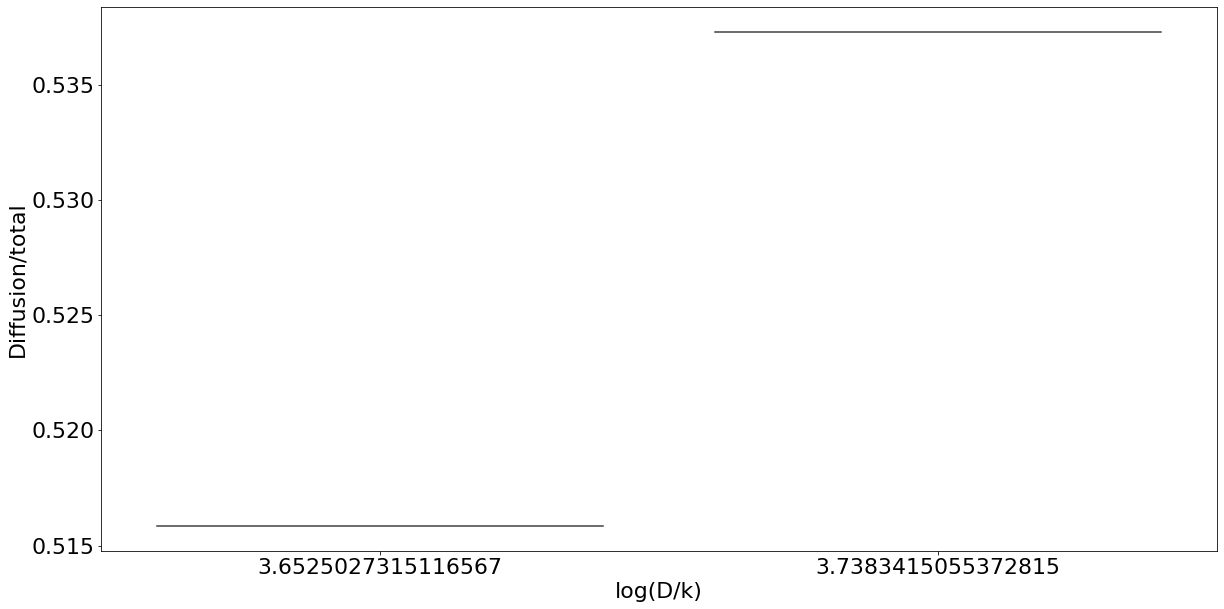

In [706]:
## temp
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 32})
valy = 'Diffusion/total'
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 1:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
#abox['classnm'] = r
property1 = 'log(D/k)'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])
    g2 = g2.append(g)

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['classnm']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
print(g3['n'])
ax2 =sns.violinplot(data=g3,x=property1,y=valy,c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
g2['log(D/k)'] = np.log10(g2['D/k'])
g3['n'] = g3['n']

g3[property1] = g3['classnm']
g3.index = range(len(g3))
if 'Precip' in property1:
    g3['Precip range (mm/yr)'] = ''
    for i in range(len(g3)):
        g3.loc[i,'Precip range (mm/yr)'] = str(int()) + ' - ' + str(int(g3.loc[i,property1].right))
    property1 = 'Precip range (mm/yr)'
sns.violinplot(data=g3,x=property1, y=valy,palette=cs)
#plt.yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels('')
plt.ylim([0,1.2])
#plt.ylim([0,1.2])
#plt.plot([.1,.1],[.2,.2])

Text(0, 0.5, 'n')

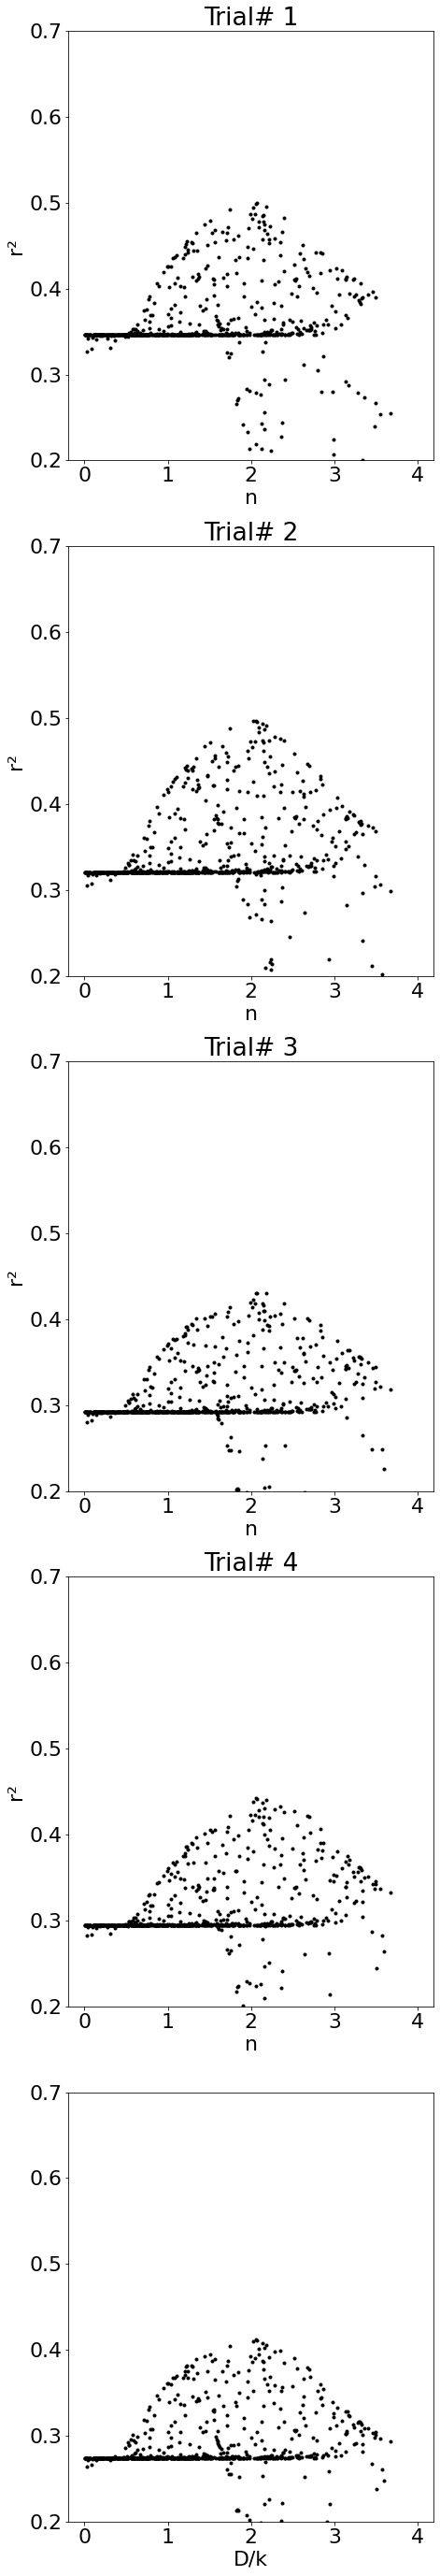

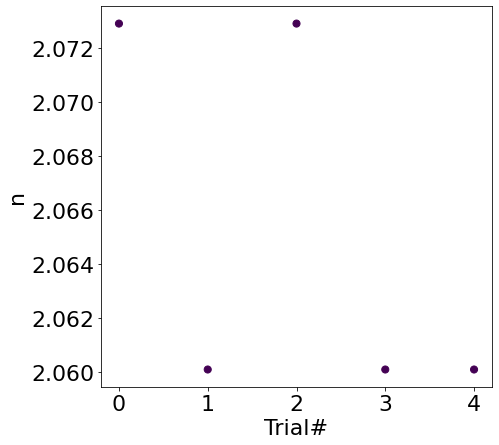

In [710]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(5,1,figsize=(7,7*7))

mt = a['meantempclass'].unique()
try:
    codes = mt.codes
except:
    codes = range(len(mt))#range(max(a['meantempclass']))

lo = np.zeros(len(codes))
r2max = np.zeros(len(codes))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
lox = np.zeros(len(codes))
abox.index = abox['class']
varnm = 'n'
c = 0;
for i in range(len(codes)):
    if mt[codes[i]] is None:
        continue
    
    var = g2.loc[g2['class'] == mt[codes[i]]][varnm].to_numpy()
    #var.index = np.range(len(var))
    plt.sca(ax[c])
    try:
        lox[i] = mt[i].left

    except:
        try:
            lox[i] = codes[i]#codes[i][0].left#lens[i]
        except:
            continue
    plt.plot(var,r2s[i], '.k')
    plt.ylim([.2, .7])
    lo[i] = var[np.argmax(r2s[i])]
    r2max[i] = np.max(r2s[i])
    plt.xlabel('D/k')
    #plt.xscale('log')
    try:
        #lith
        #plt.title(g2.loc[g2['class'] == mt[codes[i]]]['classnm'].iloc[0])
        #precip
        #plt.title('Precip = ' +str(mt[codes[i]]))
        #x - validation
        plt.title('Trial# ' +str(mt[codes[i]+1]))

    except:
        continue
    #plt.xlabel('E' + 'diffusion'.translate(subscript) + '/' 'E' + 'total'.translate(subscript))
    plt.xlabel(varnm)
    plt.ylabel('r'+'2'.translate(superscript))
    #plt.xlabel(t.loc[codes[i],'region'])
    c+=1
fig,ax = plt.subplots(figsize=(7,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.scatter(lox[r2max>.1],lo[r2max>.1],c=mntemp[r2max>.1], s=50)
#plt.scatter(lo[r2max>.3],r2max[r2max>.3],c='k',s=50)

#plt.yscale('log')
plt.xlabel ('Trial#')
plt.ylabel (varnm)
#plt.ylabel('r' + '2'.translate(superscript))
#plt.ylim((0,4))
#plt.xscale('log')

In [ ]:
plt.plot(a['maxr2'][a['meantempclass']==13],a['ebe_mmkyr'][a['meantempclass'] == 13]/1000,'.')
plt.xscale('log')
plt.yscale('log')

<ipython-input-23-b1b1f11ebd84>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a1.geometry = a1.centroid
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


19

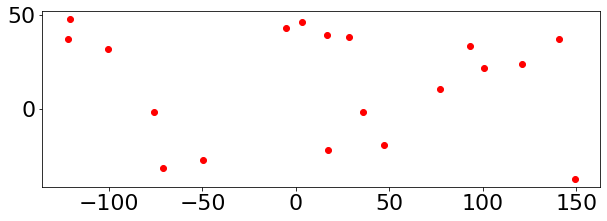

In [23]:
a1 = a[a['meantempclass'] == 1]
fig,ax = plt.subplots(figsize=(10,10))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).plot(ax=ax,alpha=.5)
a1.geometry = a1.centroid
a1.plot(color='r',ax=ax)
len(a1)


In [379]:
slps1 = np.load('slpsall.npy')

<ipython-input-386-e4a303034d1d>:8: RuntimeWarning: divide by zero encountered in log
  x = np.log(slps1[:len(a)])


Text(0.00630957344480193, 0.005011872336272725, 'slope = 1.7 ')

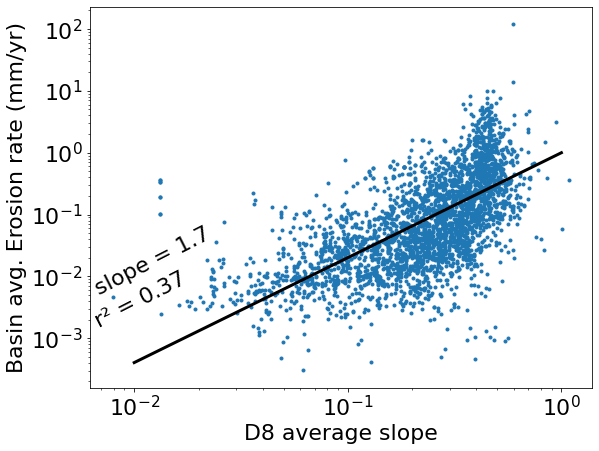

In [386]:
plt.subplots(figsize=(9,7))
plt.plot(slps1[:len(a)], a['ebe_mmkyr']/1000,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 average slope')
plt.ylabel('Basin avg. Erosion rate (mm/yr)')
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(slps1[:len(a)])
#I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#x=x[I_min]
#y=y[I_min]
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isinf(y)))[0]
x=np.delete(x,I2)
y=np.delete(y,I2)



l1  = lm.LinearRegression(fit_intercept=False)
l1 = l1.fit(x.reshape(-1,1),y.reshape(-1,1))
x2 = np.log(np.linspace(10**-2,10**0,100).reshape(-1,1))
y2 = l1.predict(x2)
plt.plot(np.exp(x2),np.exp(y2),'k',linewidth=3)
y3 = l1.predict((x.reshape(-1,1)))
r2 = sklearn.metrics.r2_score(y.reshape(-1,1),y3.reshape(-1,1))
plt.text(10**-2.2,10**-2.82,'r' +'2'.translate(superscript) + ' = {} '.format(str(np.round(r2,2))),rotation=27)
plt.text(10**-2.2,10**-2.3,'slope'+ ' = {} '.format(str(np.round(l1.coef_[0][0],1))),rotation=27)


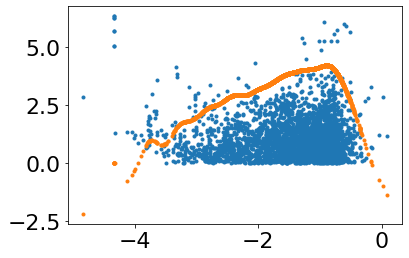

In [377]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
diff = np.abs(y3.reshape(-1,1)-y.reshape(-1,1))
lens = np.array(list(range(len(diff))))
kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(x.reshape([-1,1]),diff.reshape([-1,1]))
s = kde.score_samples(x.reshape(-1,1))
plt.plot(x,diff,'.')
plt.plot(x,s+4.5,'.')


In [1526]:
a['meantempclass'] = 0
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
a['meantempclass'][a.index[a.geometry.centroid.x<-90]] = 3# West coast
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.x>100,a.geometry.centroid.y<0)]] = 4

<ipython-input-1526-54ac65292004>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
<ipython-input-1526-54ac65292004>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
<ipython-input-1526-54ac65292004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][a.index[np.logical_and(a.geometry.centr

In [ ]:
#a['binval'] = [a['meantempclass'][i].left for i in range(len(a))]

fig,ax = plt.subplots(figsize=(20,20))
b = a.copy()
b.geometry = b.geometry.centroid
b.plot(column='meantempclass',ax=ax,vmin=-1,vmax=20,cmap='jet', s = 1)

In [1023]:
l1 =[]
for i in range(len(dfs)):
    l1.append(len(dfs[i][dfs[i]>.00001]))
l1 = np.array(l1)

1.5705192050025845e-07

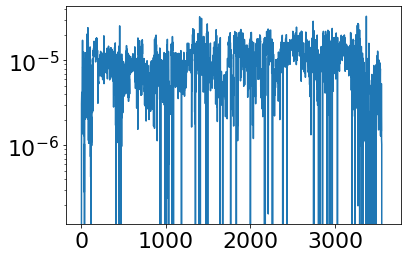

In [1001]:
plt.plot(dfs[100])
plt.yscale('log')
np.min(dfs[100][dfs[100]>0])

## I copied over parts of the diffusion notebook here

In [257]:
folder = 'results/mn0_2'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [258]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
dfs_d = dfs.copy()

In [259]:
folder = 'results/r_mn05_6'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [260]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
drat = np.array([None]*len(eros1[1]))
            
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        drat[i] = np.zeros(len(eros1))

        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i] #- dfs_d[0][k]* diffus[i]/.01
                #dfs[i][k] = dfs[i][k] + dfs_d[0][k]*200
                drat[i][k] = (dfs_d[0][k] * diffus[i] / .01 ) / eros1[k][i] 
            c+=1
    #return dfs


<ipython-input-260-00be126957c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  drat[i][k] = (dfs_d[0][k] * diffus[i] / .01 ) / eros1[k][i]


In [261]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()
badn = []
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression(fit_intercept=False)
        if len(x[np.logical_not(np.isnan(x))])>n-3000:
                #print(len(x[np.logical_not(np.isnan(x))]))
                
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                intercept =np.mean(y-x)
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                try:
                    r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)

                except:
                    print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = -np.sum(np.power(y.ravel()-np.log(y3.ravel()),2))
                #print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p1.intercept_
                dratave[i] = np.mean(drat[i][np.logical_and(drat[i]>0, np.abs(drat[i]) < 1e10 )])
               # if resid[i]>127.9:
                #    break
        else:
            print(i)
            badn.append(diffus[i])
            


<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-261-7112be0e8324>:16: RuntimeWarning: divide by z

In [249]:
for i in range(1000):
    #print(np.mean(drat[i][np.logical_and(drat[i]>0, np.abs(drat[i]) < 1e10 )]))

IndentationError: expected an indented block (<ipython-input-249-6ec7fb48afa8>, line 2)

In [417]:
np.mean(dratave)

0.6247337123288612

(0.3, 0.5)

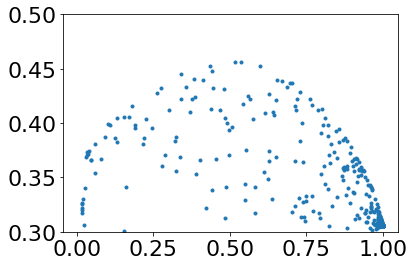

In [414]:
plt.plot(dratave,r2s,'.')
plt.ylim([.3,.5])

In [386]:
1/3.9

0.25641025641025644

In [526]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
mt = a['meantempclass'].unique()
codes = mt.codes
lo = np.zeros(len(codes))
var = dratave


lox = np.zeros(len(codes))
for i in range(len(codes)):
    lox[codes[i]] = mt[codes[i]].left
    fig,ax = plt.subplots(figsize=(10,7))
    plt.plot(var,r2s[codes[i]], '.k')
    plt.ylim([.2, .65])
    lo[codes[i]] = var[np.argmax(r2s[codes[i]])]
    plt.xlabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
    #plt.xscale('log')
    plt.title('Range = ' + str(mt[codes[i]]))

fig,ax = plt.subplots(figsize=(10,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.plot(lox,lo,'k.-',linewidth=2,markersize=30)
plt.ylabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
plt.xlabel ('Mean Annual Precipitation (mm/yr)')
#plt.yscale('log')


KeyError: 'meantempclass'

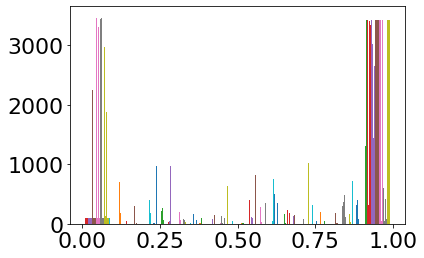

## Geologic 

In [199]:
from rasterstats import zonal_stats as zn
import rasterio as rio

In [282]:
geo = zn(a,'/Volumes/Samsung_T5/geo4.tif',stats=['majority','min','max','mean'])
major = [geo[i]['majority'] for i in range(len(geo))]
means = [geo[i]['mean'] for i in range(len(geo))]
mins = [geo[i]['min'] for i in range(len(geo))]

/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [283]:
np.save('geo_major.npy', major)

In [284]:
a['meantempclass'] = major
#a['meantempclass'] 

3553

In [203]:
sns.color_palette("tab10").as_hex()[0]

'#1f77b4'

<ipython-input-204-84c3268153e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 146] = 1
<ipython-input-204-84c3268153e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 96] = 0
<ipython-input-204-84c3268153e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 167] = 2
<ipython-input-204-84c3268153e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

<AxesSubplot:>

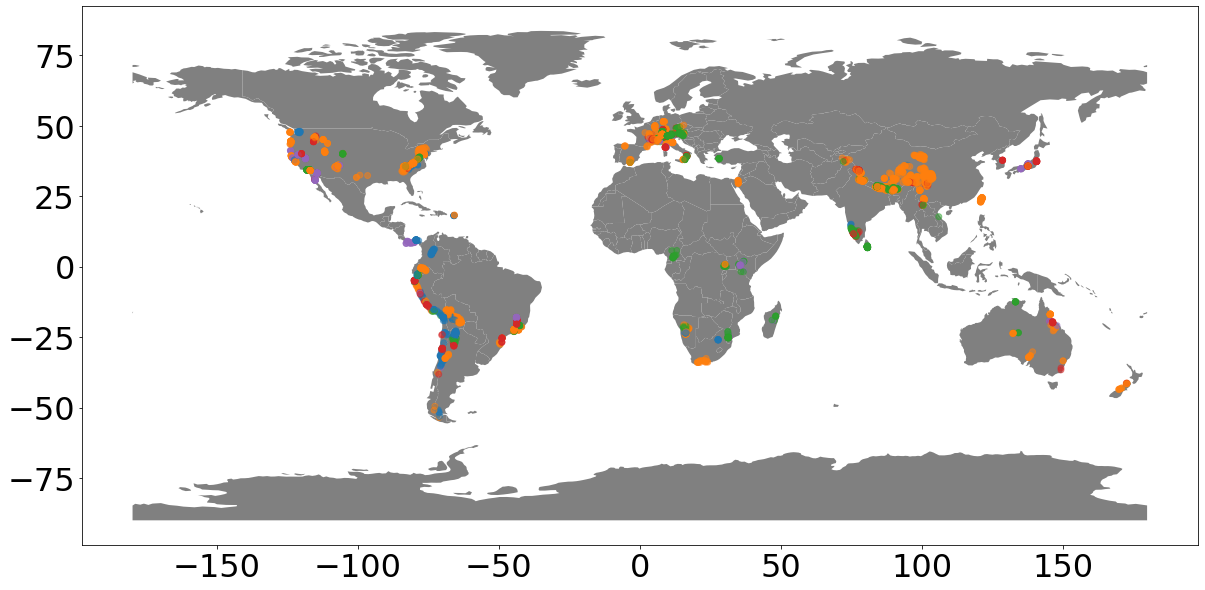

In [204]:
from matplotlib.colors import ListedColormap

fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = major

a['geo'][a['geo'] == 146] = 1
a['geo'][a['geo'] == 96] = 0 
a['geo'][a['geo'] == 167] = 2
a['geo'][a['geo'] == 252] = 3
a['geo'][a['geo'] == 255] = 4

a2 = a.copy()
a2.geometry = a.geometry.centroid


a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("tab10").as_hex()[:5]),vmin=0, vmax=5,alpha=.5)
#plt.imshow(f)

In [211]:
len(np.logical_and(a['geo']>0 and a['geo'] < 5))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [1598]:
f = rio.open('
             /geology.tif')
r = f.read()
r2 = r.copy()

In [1599]:


geovals = [146,167,252,255,96,253,176,187]



In [1600]:
ageo = gpd.GeoDataFrame(geometry=a['geometry'])

In [1688]:
ageo['geo'] = a['geo']

In [1689]:
ageo.to_file('geo_test')

In [ ]:
test['Short-term erosion rate (mm kyr^-1)']

In [699]:
test = pd.read_csv('/Users/gr_1/Downloads/Chen_et_al_2021_short-term_erosion_rate_data.csv')

In [705]:
test['log(short-term erosion rate (mm kyr-1))'] = np.log10(test['Short-term erosion rate (mm kyr^-1)'])

In [ ]:
test['log(short-term erosion rate (mm kyr-1))']

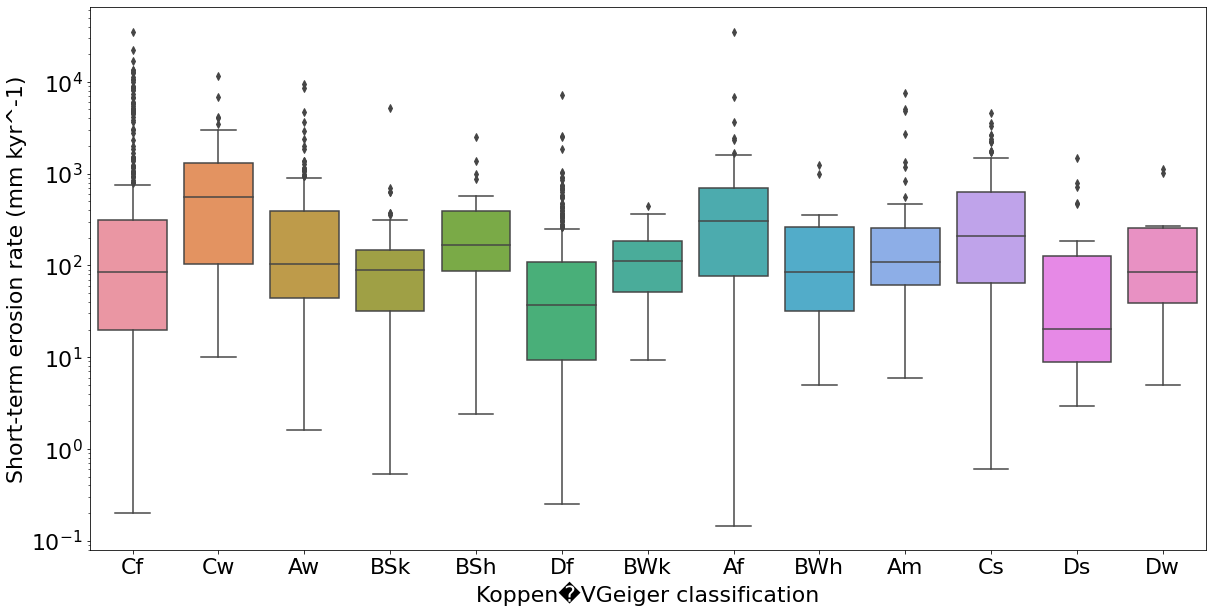

In [706]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=test,x='Koppen�VGeiger classification',y='Short-term erosion rate (mm kyr^-1)')
plt.yscale('log')

AttributeError: module 'seaborn' has no attribute 'qqplot'

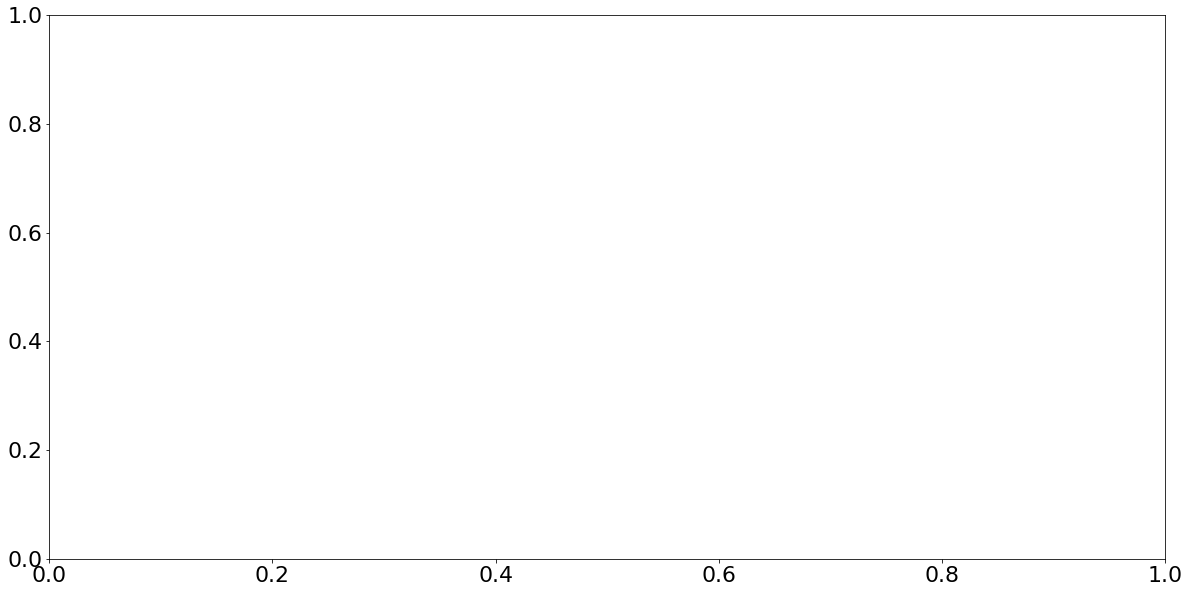

In [774]:
plt.subplots(figsize=(20,10))

sns.qq(data=test,x='Koppen�VGeiger classification',y='log(short-term erosion rate (mm kyr-1))')


In [783]:
from statsmodels.graphics.gofplots import qqplot_2samples

<AxesSubplot:xlabel='log(short-term erosion rate (mm kyr-1))', ylabel='Count'>

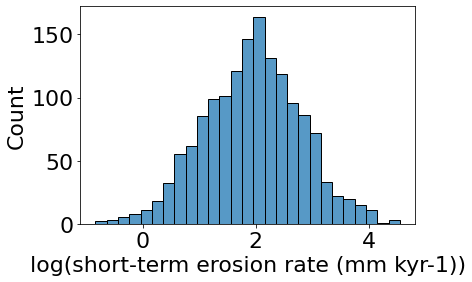

In [708]:
sns.histplot(data=test,x='log(short-term erosion rate (mm kyr-1))')

In [801]:
from scipy.stats import kruskal as ks

In [818]:
g1 = []
g2 = []
for i,g in test.groupby('Koppen�VGeiger classification'):
    g1.append(g['Short-term erosion rate (mm kyr^-1)'])
    g2.append(g['log(short-term erosion rate (mm kyr-1))'])

In [819]:
p = np.zeros((len(g1),len(g1)))
for i in range(len(g1)):
    for j in range(i,len(g1)):
        p[i,j] = ks(g1[j],g1[i]).pvalue

In [815]:
g1 = []
for i in range(10):
    subset = test.sample(10)
    g1.append(subset['Short-term erosion rate (mm kyr^-1)'])

([<matplotlib.axis.YTick at 0x1b5a0e580>,
 [Text(0, 0, 'Cf'),
  Text(0, 1, 'Cw'),
  Text(0, 2, 'Aw'),
  Text(0, 3, 'BSk'),
  Text(0, 4, 'BSh'),
  Text(0, 5, 'Df'),
  Text(0, 6, 'BWk'),
  Text(0, 7, 'Af'),
  Text(0, 8, 'BWh'),
  Text(0, 9, 'Am'),
  Text(0, 10, 'Cs'),
  Text(0, 11, 'Ds'),
  Text(0, 12, 'Dw')])

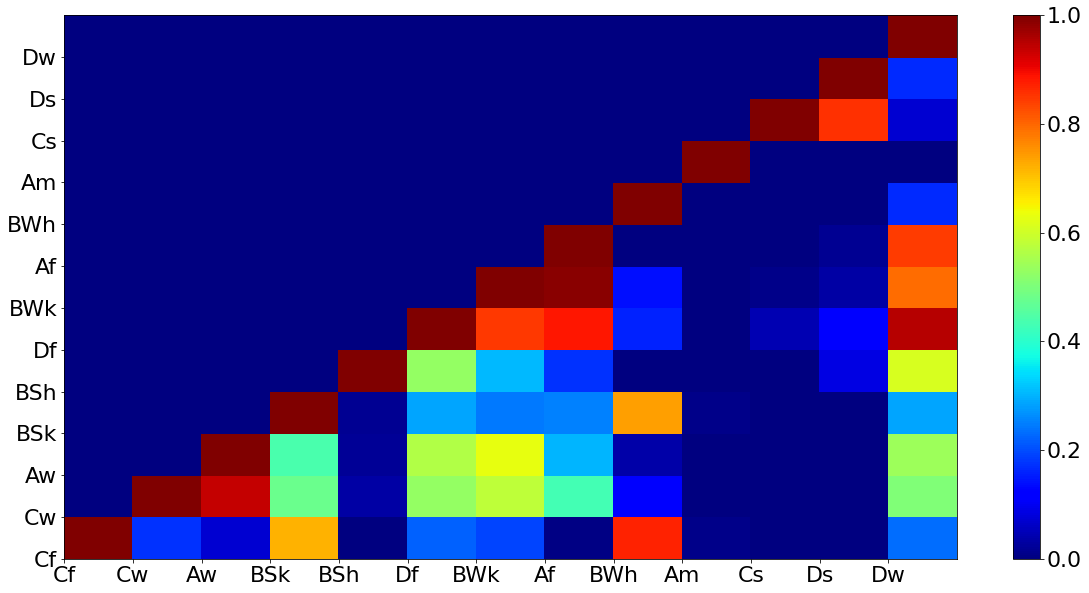

In [773]:
plt.subplots(figsize=(20,10))
plt.pcolor(p,vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.xticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())
plt.yticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())